# Numerical Features Processing & Imputations

In [1]:
from eml.datanavig import off_columns_dict
cols = off_columns_dict.copy()
from eml.datanavig import *
from eml.functions import *

In [349]:
cols.keys()

dict_keys(['robotoff', 'meta', 'image', 'infopdt', 'ingredients', 'cats', 'geo', 'empty', 'dummy', 'tags', '100g', 'numeric'])

In [2]:
import pandas as pd
import numpy as np 
import re
import os
import time 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

#robotoff
from robotoff.products import ProductDataset
from robotoff.taxonomy import get_taxonomy

from IPython.lib.deepreload import reload as dreload
from pandas import json_normalize

#Settings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.options.mode.chained_assignment = None
sns.set()

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
pd.set_option("display.max_columns", 200, "display.max_rows", 200)

In [5]:
df = pd.read_csv('df_pnns.csv', low_memory=False)
df.shape

(808019, 184)

In [6]:
from eml.datanavig import drop_cols, remove_cols_dict
remove_cols_dict(cols_dict=cols, cols_to_drop=drop_cols(df=df, tresh=50000, inplace=False, print_cols=True))

Column removed : abbreviated_product_name --- dtype : object
Column removed : packaging_text --- dtype : object
Column removed : first_packaging_code_geo --- dtype : object
Column removed : cities --- dtype : float64
Column removed : allergens_en --- dtype : float64
Column removed : no_nutriments --- dtype : float64
Column removed : additives --- dtype : object
Column removed : ingredients_from_palm_oil --- dtype : float64
Column removed : ingredients_from_palm_oil_tags --- dtype : object
Column removed : ingredients_that_may_be_from_palm_oil --- dtype : float64
Column removed : ingredients_that_may_be_from_palm_oil_tags --- dtype : object
Column removed : energy-from-fat_100g --- dtype : float64
Column removed : -butyric-acid_100g --- dtype : float64
Column removed : -caproic-acid_100g --- dtype : float64
Column removed : -caprylic-acid_100g --- dtype : float64
Column removed : -capric-acid_100g --- dtype : float64
Column removed : -lauric-acid_100g --- dtype : float64
Column removed 

In [11]:
df[cols['numeric']].shape

(808019, 25)

In [14]:
df[cols['numeric']].isnull().sum()

serving_quantity                           405124
additives_n                                241437
ingredients_from_palm_oil_n                241437
ingredients_that_may_be_from_palm_oil_n    241437
nutriscore_score                           178220
nova_group                                 280467
energy-kj_100g                             702471
energy-kcal_100g                           149033
energy_100g                                 91901
fat_100g                                    94351
saturated-fat_100g                         134680
trans-fat_100g                             564780
cholesterol_100g                           560679
carbohydrates_100g                          95007
sugars_100g                                113219
fiber_100g                                 413974
proteins_100g                               94503
salt_100g                                  102878
sodium_100g                                102880
vitamin-a_100g                             614830


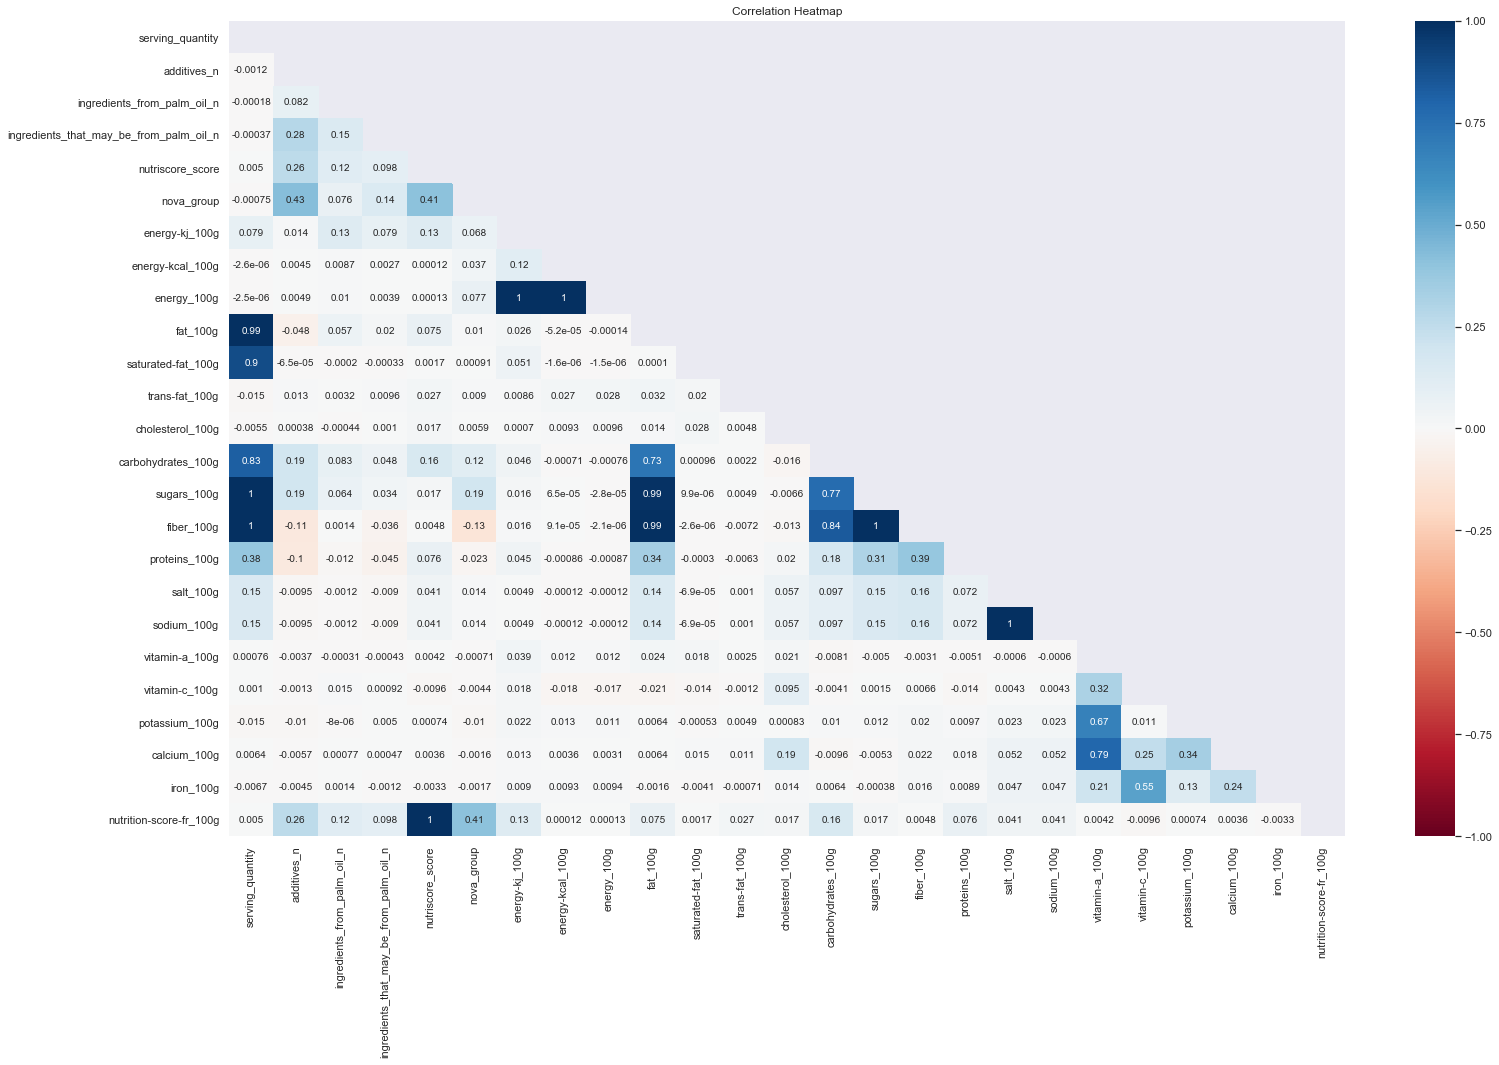

In [13]:
from eml.eda import plot_correlations
plot_correlations(df[cols['numeric']])

In [7]:
to_drop = ['serving_quantity', 'nutrition-score-fr_100g', 'energy-kj_100g', 'energy-kcal_100g', 'fiber_100g', 'sodium_100g']
remove_cols_dict(cols_dict=cols, cols_to_drop=to_drop)
df[cols['numeric']].isnull().sum()

additives_n                                241437
ingredients_from_palm_oil_n                241437
ingredients_that_may_be_from_palm_oil_n    241437
nutriscore_score                           178220
nova_group                                 280467
energy_100g                                 91901
fat_100g                                    94351
saturated-fat_100g                         134680
trans-fat_100g                             564780
cholesterol_100g                           560679
carbohydrates_100g                          95007
sugars_100g                                113219
proteins_100g                               94503
salt_100g                                  102878
vitamin-a_100g                             614830
vitamin-c_100g                             608015
potassium_100g                             721845
calcium_100g                               559718
iron_100g                                  564714
dtype: int64

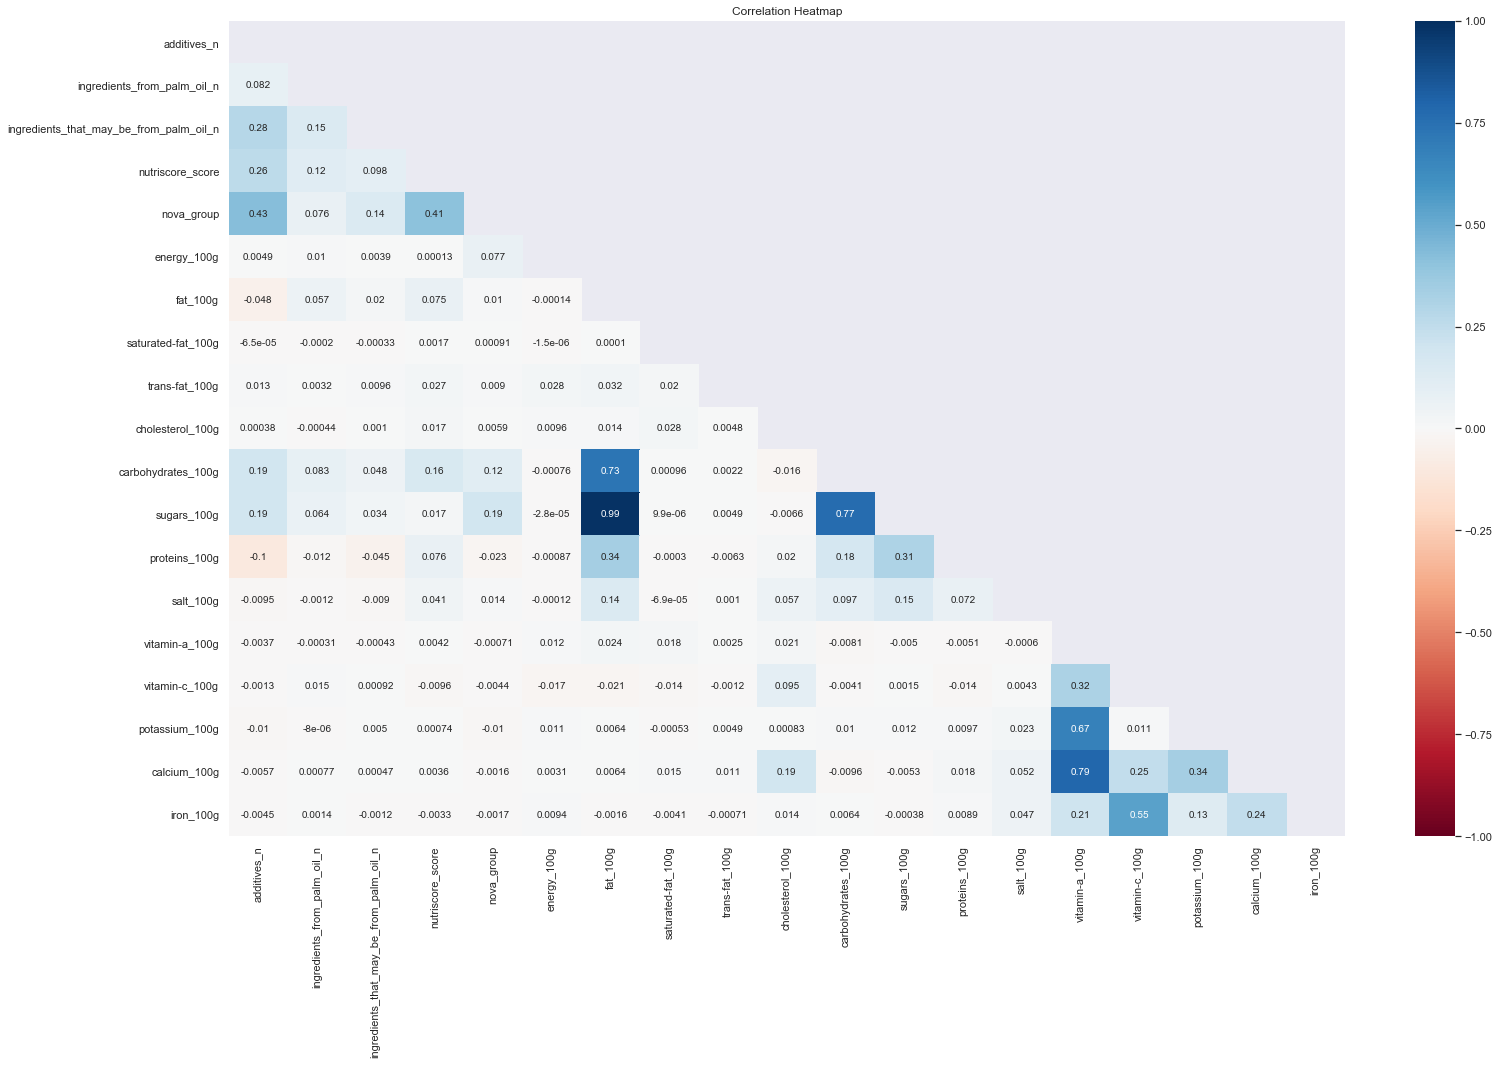

In [16]:
plot_correlations(df[cols['numeric']])

In [8]:
labels = df.pnns_groups_2.unique()

# energy_100g

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['energy_100g'].describe()

count           716118.00000
mean          50854402.59659
std        42984517881.27121
min                  0.00000
25%                406.00000
50%               1075.00000
75%               1674.00000
max     36375089324205.00000
Name: energy_100g, dtype: float64

Wall time: 25.7 s


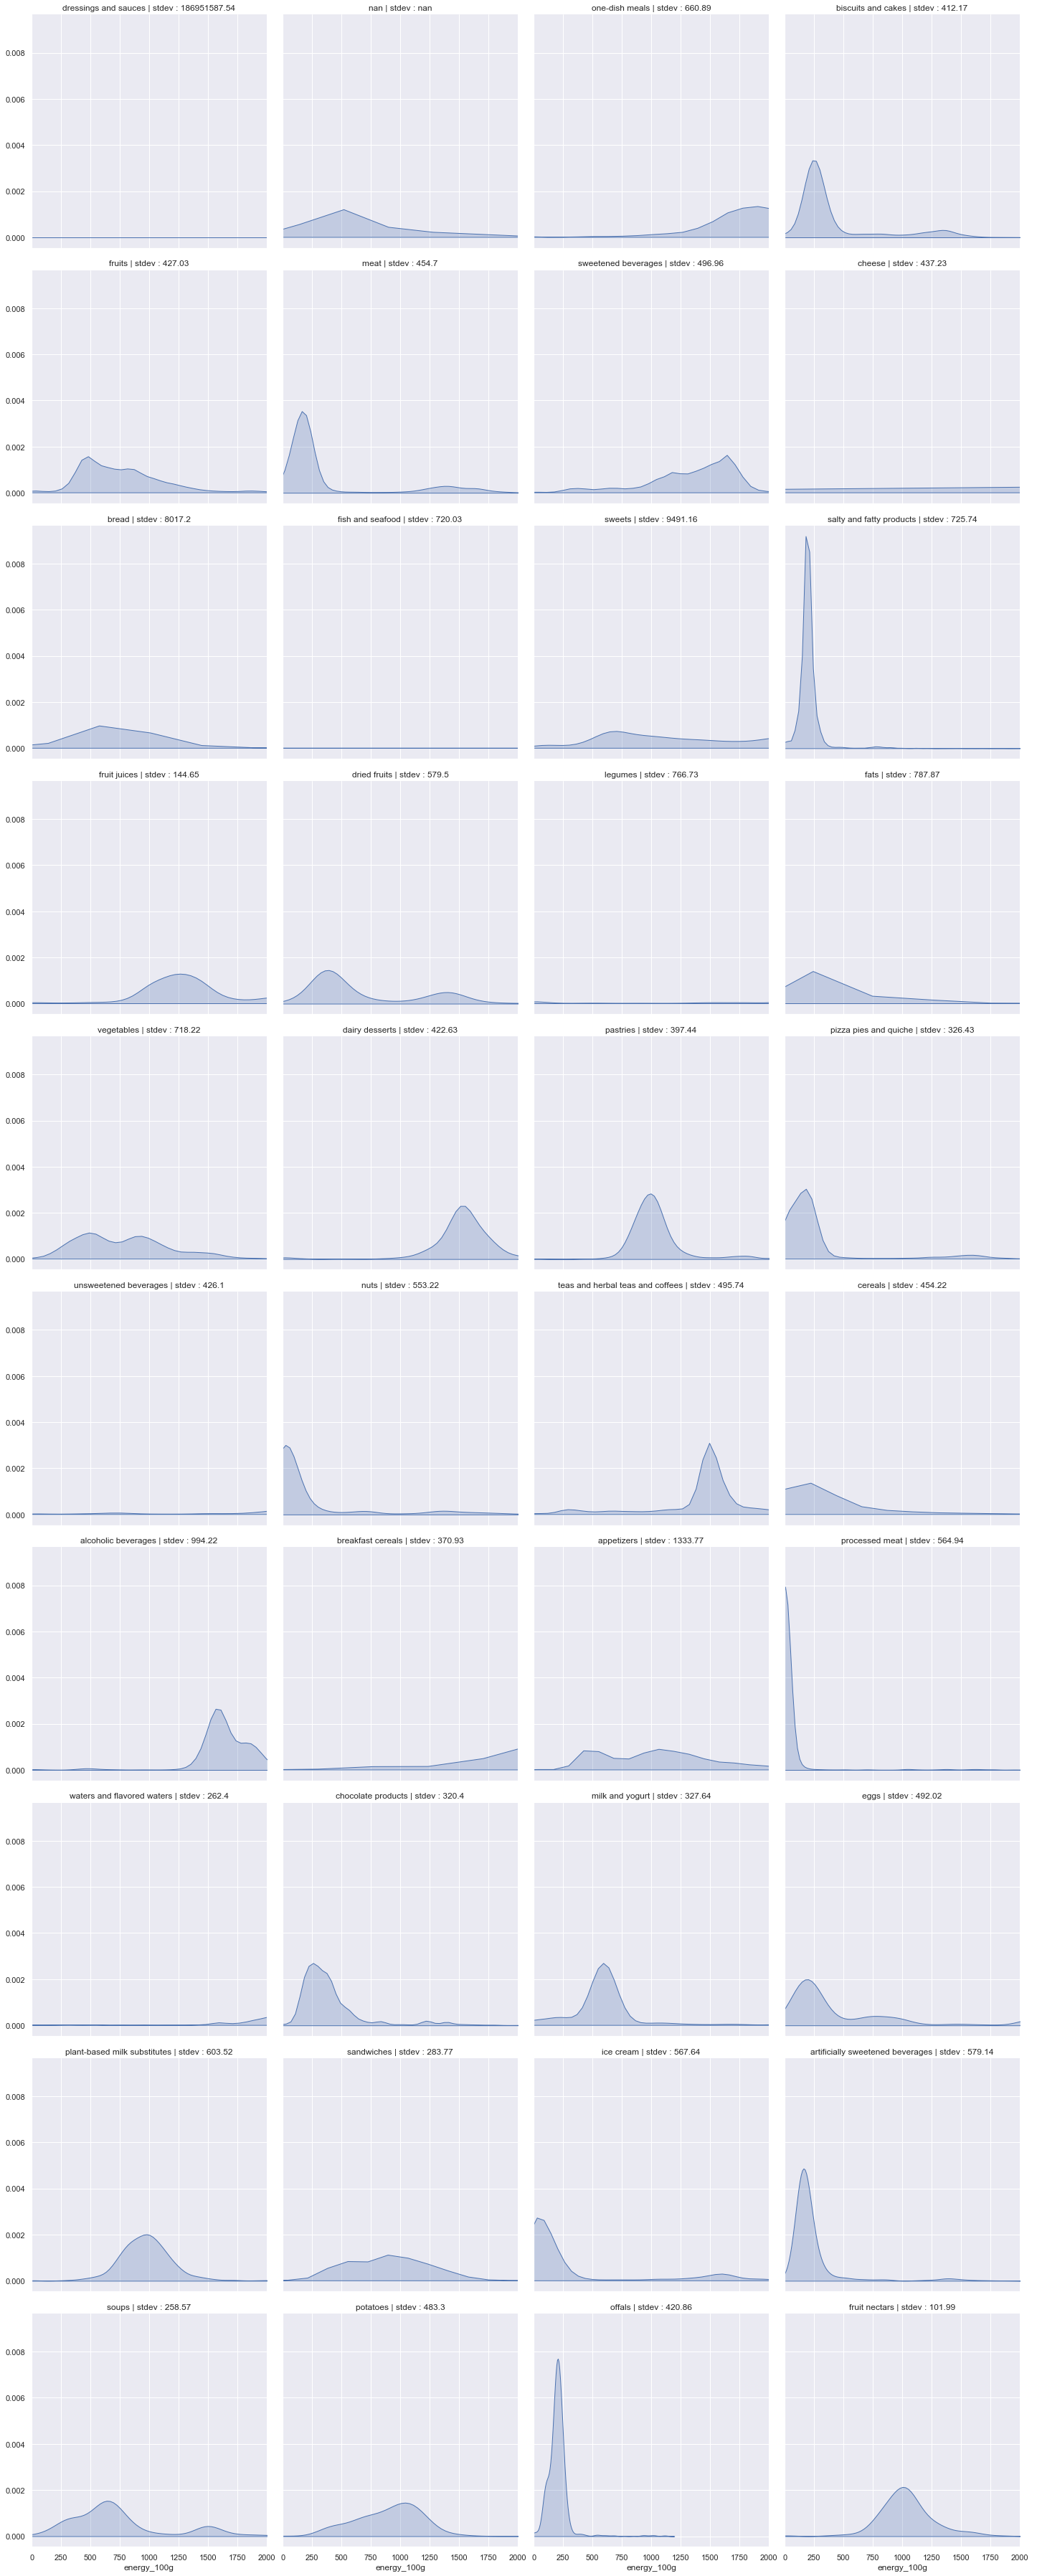

In [23]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.kdeplot, "energy_100g", fill=True)
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} | stdev : {round(df.loc[df["pnns_groups_2"] == label]["energy_100g"].std(),2)}')
   plt.xlim(0,2000)

# fat_100g

In [24]:
labels = df.pnns_groups_2.unique()
df['fat_100g'].describe()

count   713668.00000
mean        13.89781
std        112.71484
min          0.00000
25%          0.50000
50%          6.50000
75%         21.43000
max      93928.00000
Name: fat_100g, dtype: float64

Wall time: 21.5 s


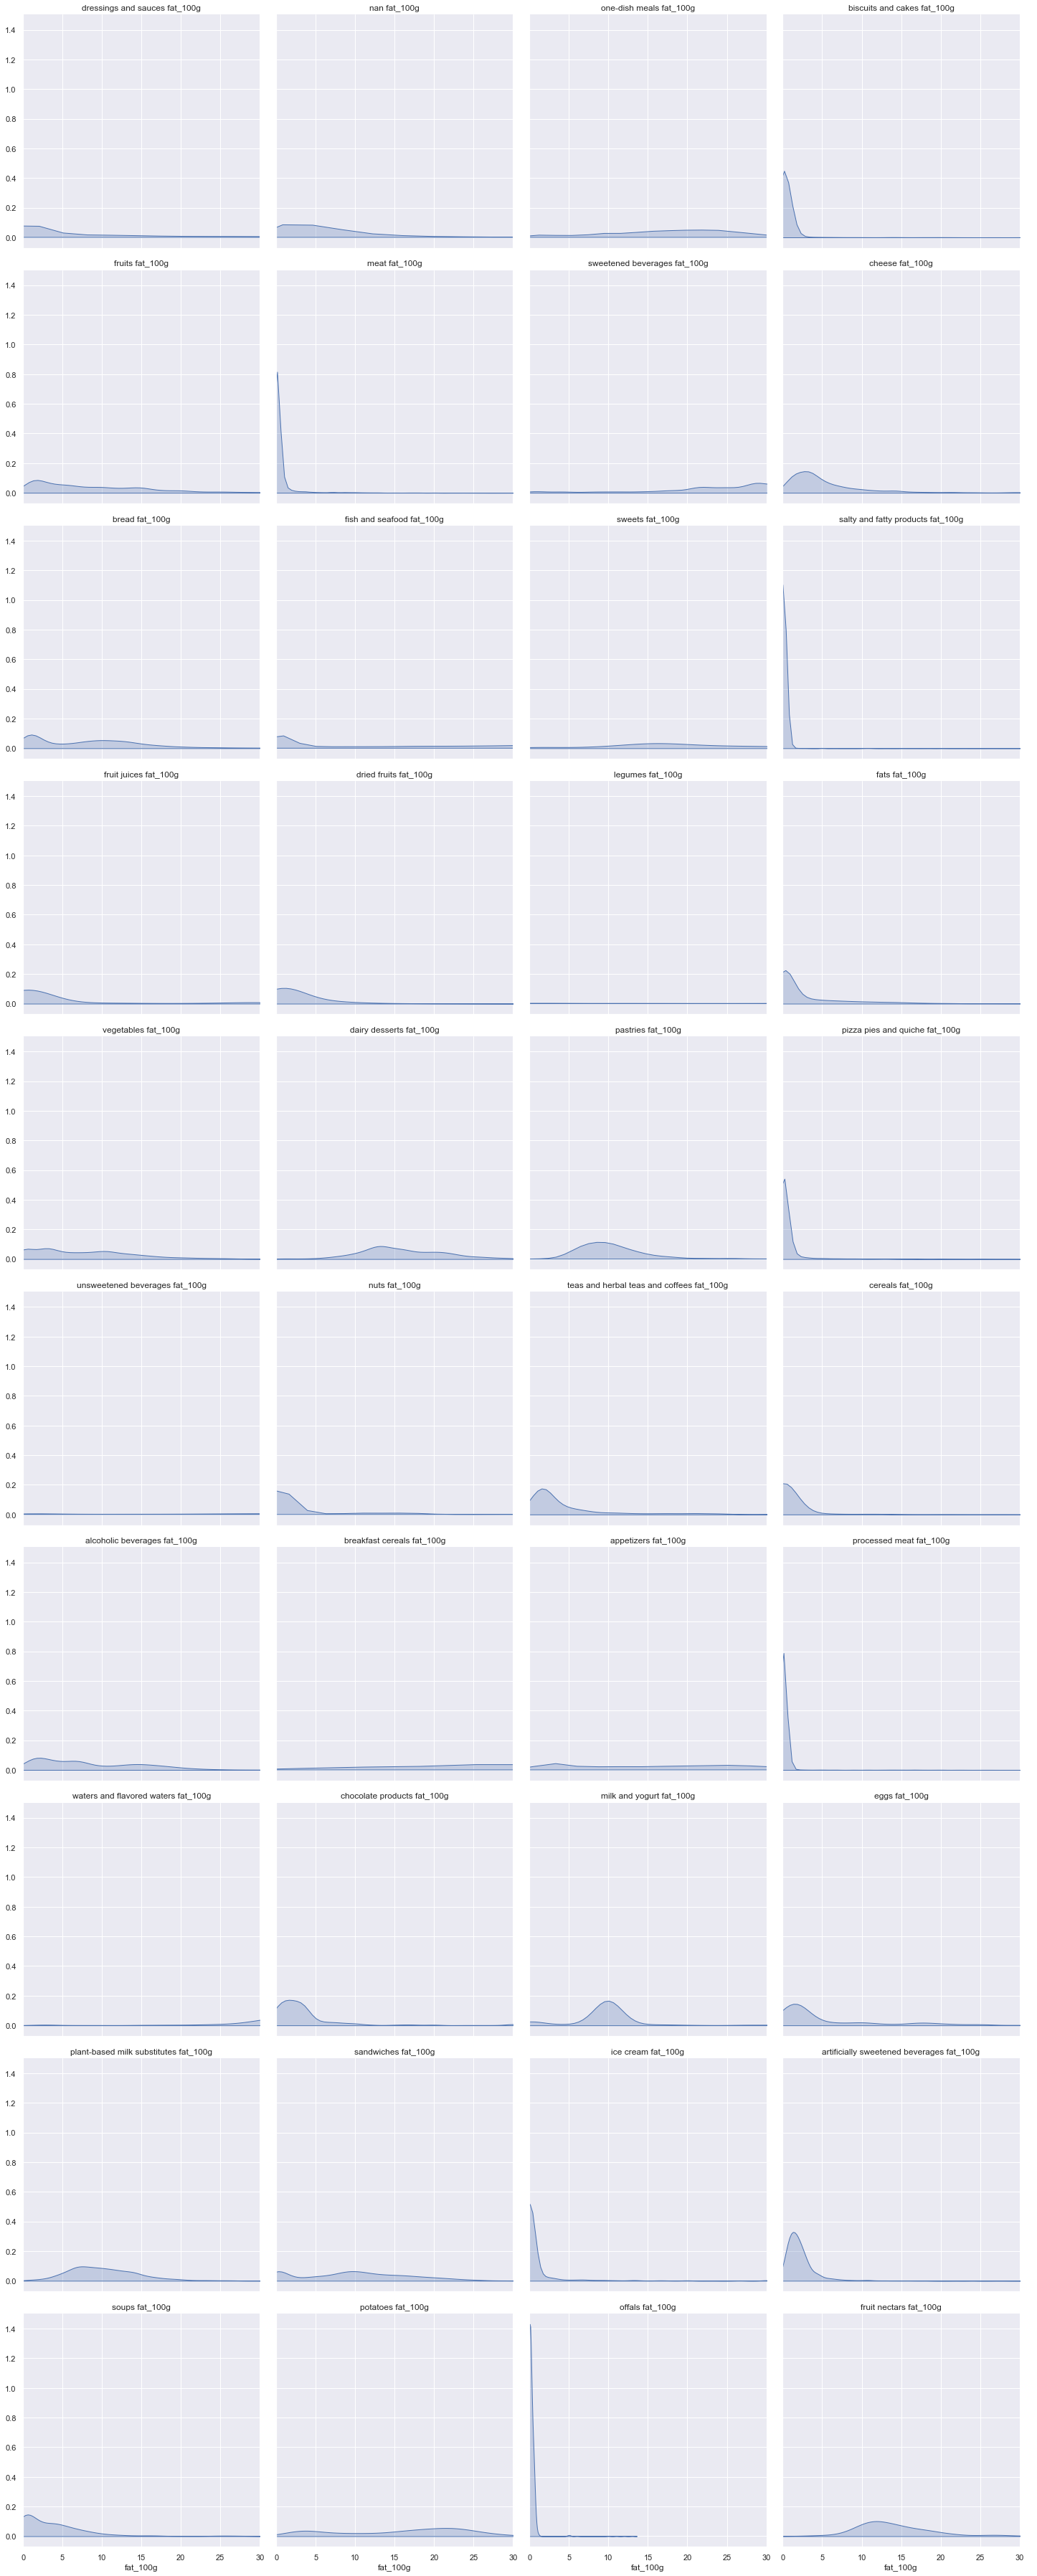

In [25]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.kdeplot, "fat_100g", fill=True)
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} fat_100g')
   plt.xlim(0,30)

# additives_n : X

In [26]:
df['additives_n'].describe()

count   566582.00000
mean         2.08780
std          2.98065
min          0.00000
25%          0.00000
50%          1.00000
75%          3.00000
max         39.00000
Name: additives_n, dtype: float64

Wall time: 19.6 s


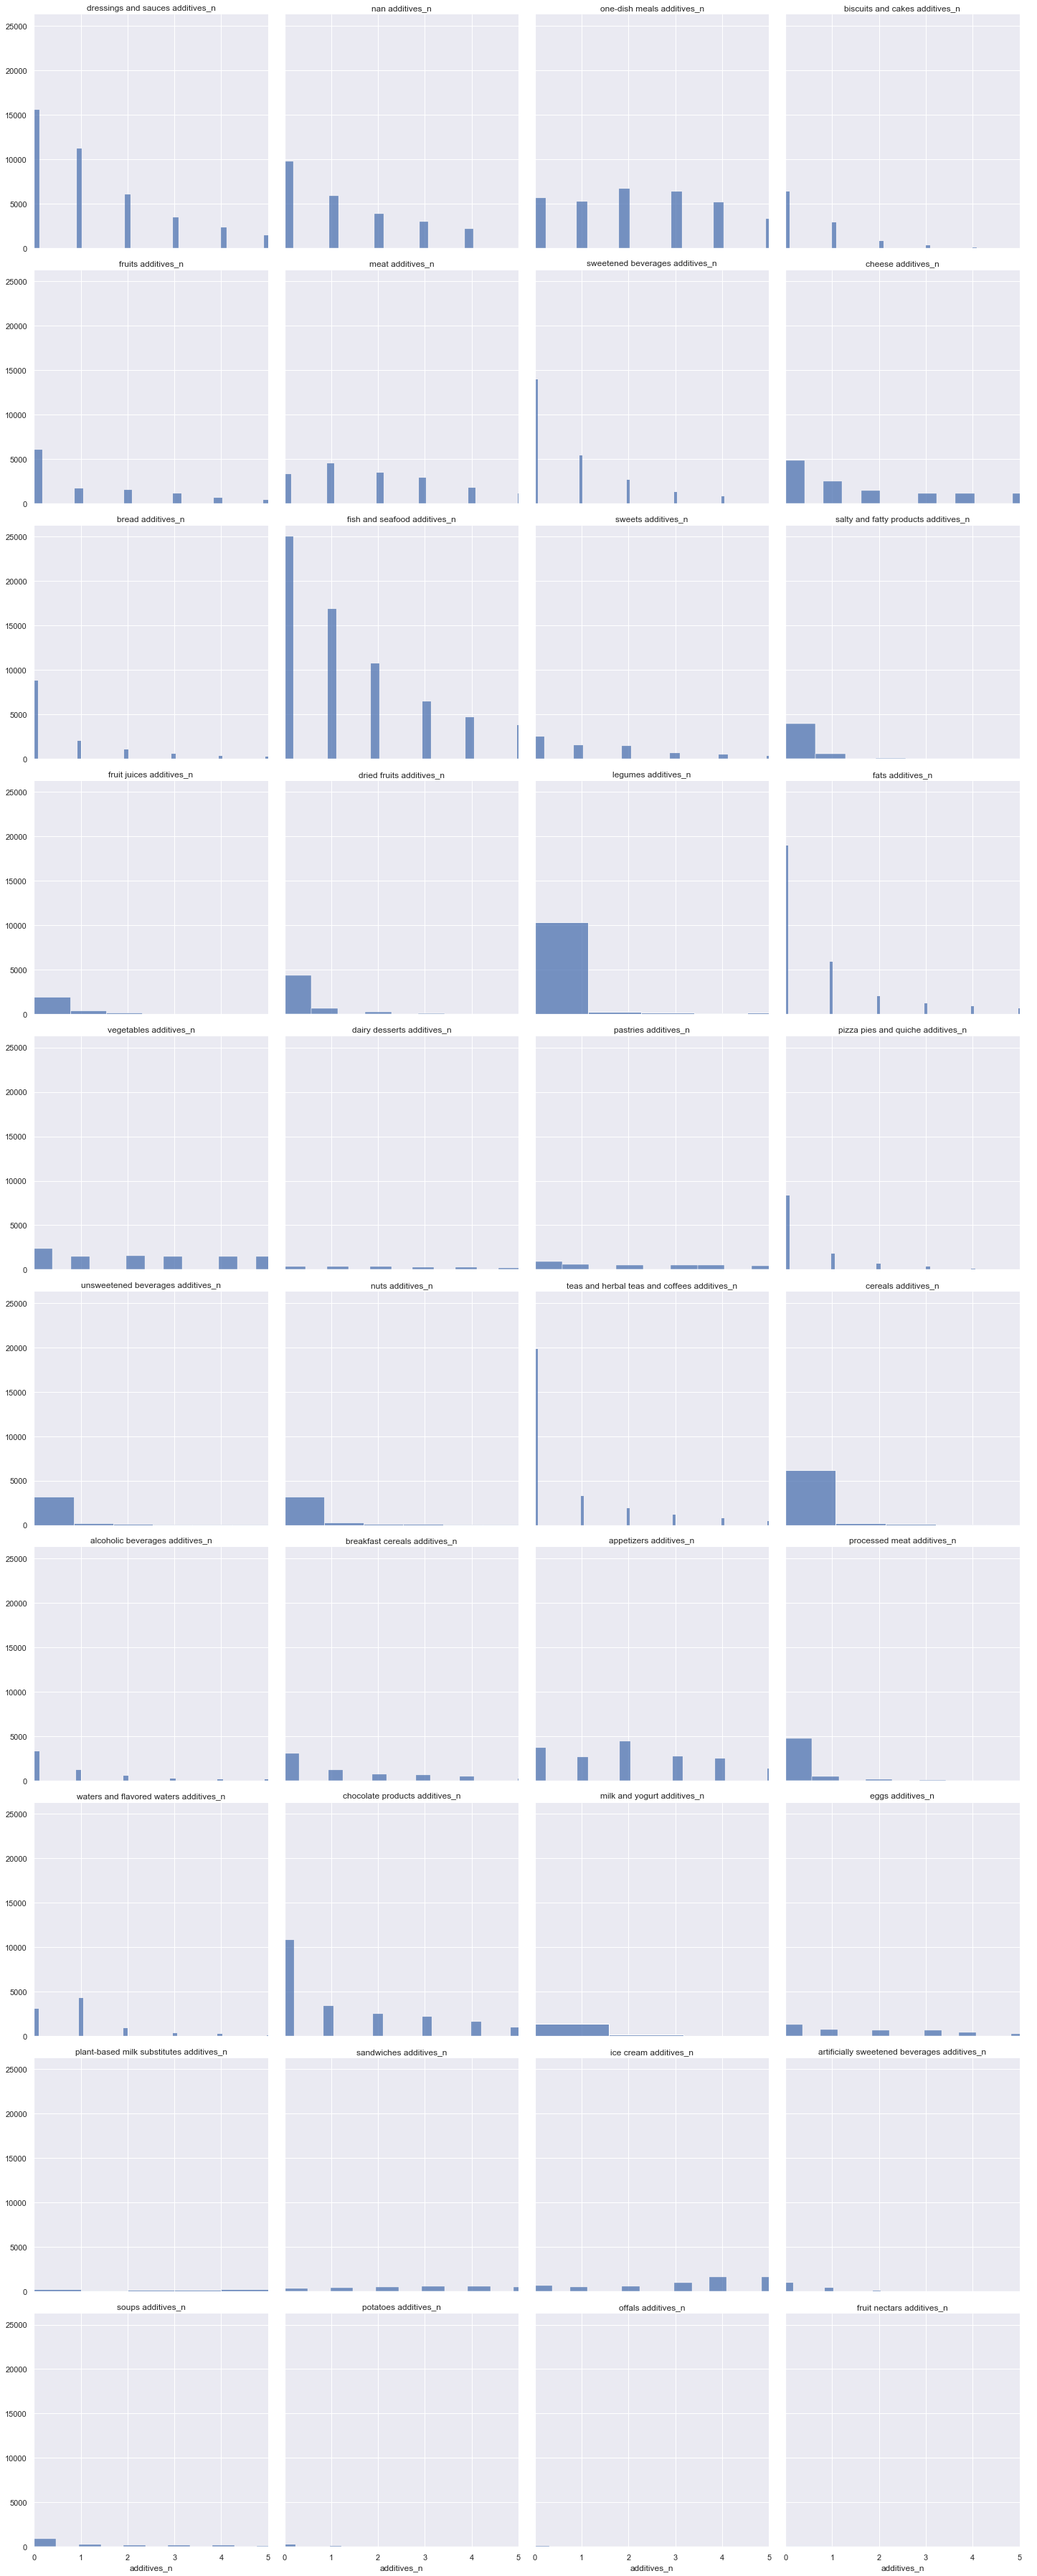

In [27]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.histplot, "additives_n")
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} additives_n')
   plt.xlim(0,5)

# nova_group : X

In [28]:
df['nova_group'].describe()

count   527552.00000
mean         3.36829
std          0.99567
min          1.00000
25%          3.00000
50%          4.00000
75%          4.00000
max          4.00000
Name: nova_group, dtype: float64

Wall time: 14.3 s


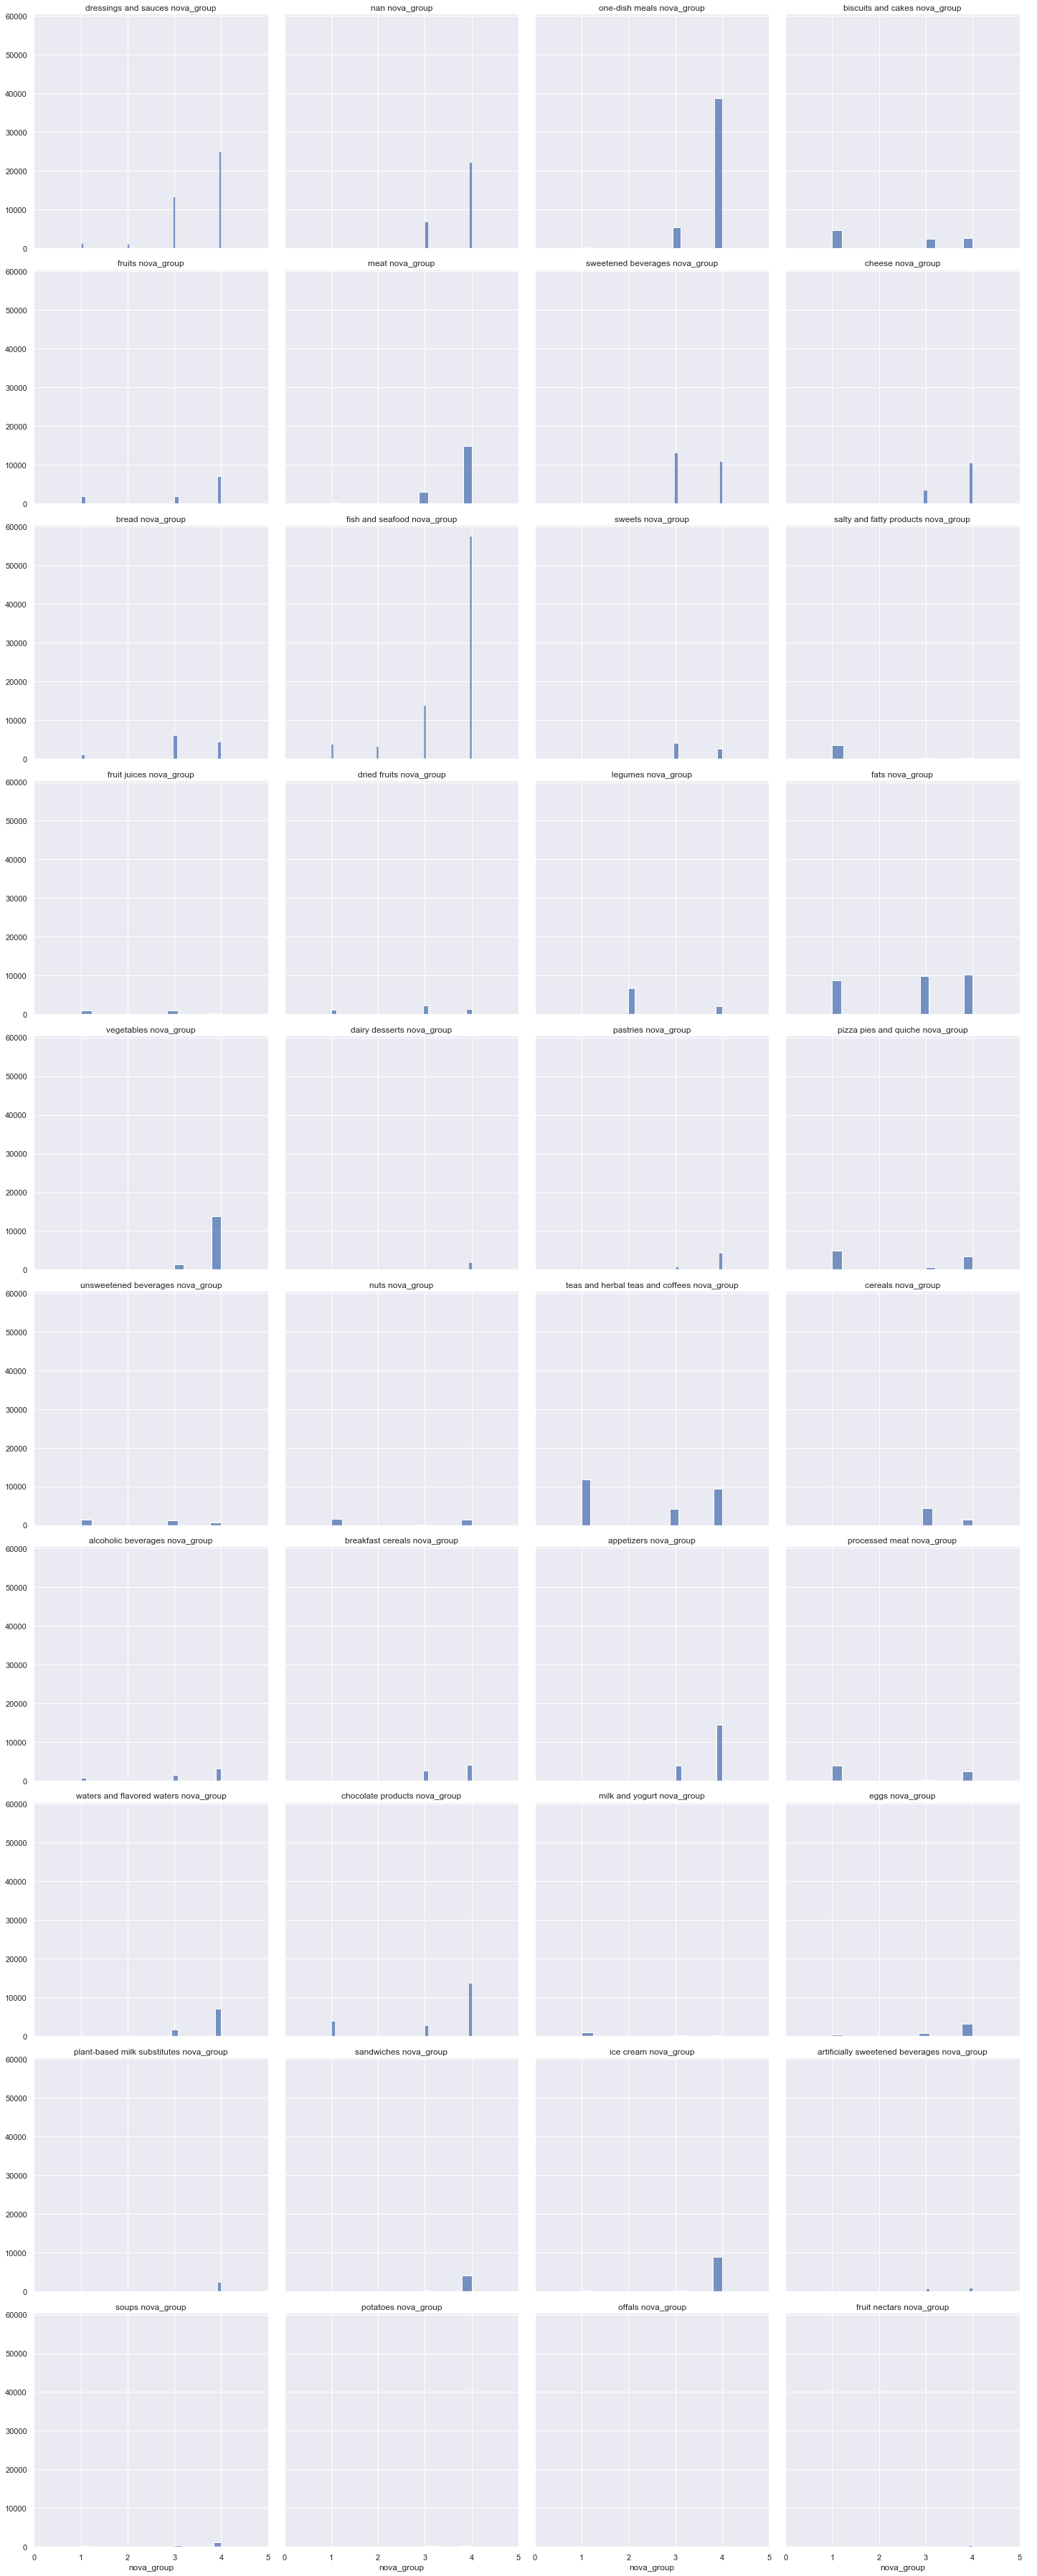

In [29]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.histplot, "nova_group")
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} nova_group')
   plt.xlim(0,5)

# trans-fat_100g

In [30]:
df['saturated-fat_100g'].describe()

count            673339.00000
mean          201978503.84394
std        165737973475.03662
min                   0.00000
25%                   0.10000
50%                   1.90000
75%                   7.45000
max     136000000238419.00000
Name: saturated-fat_100g, dtype: float64

Wall time: 21 s


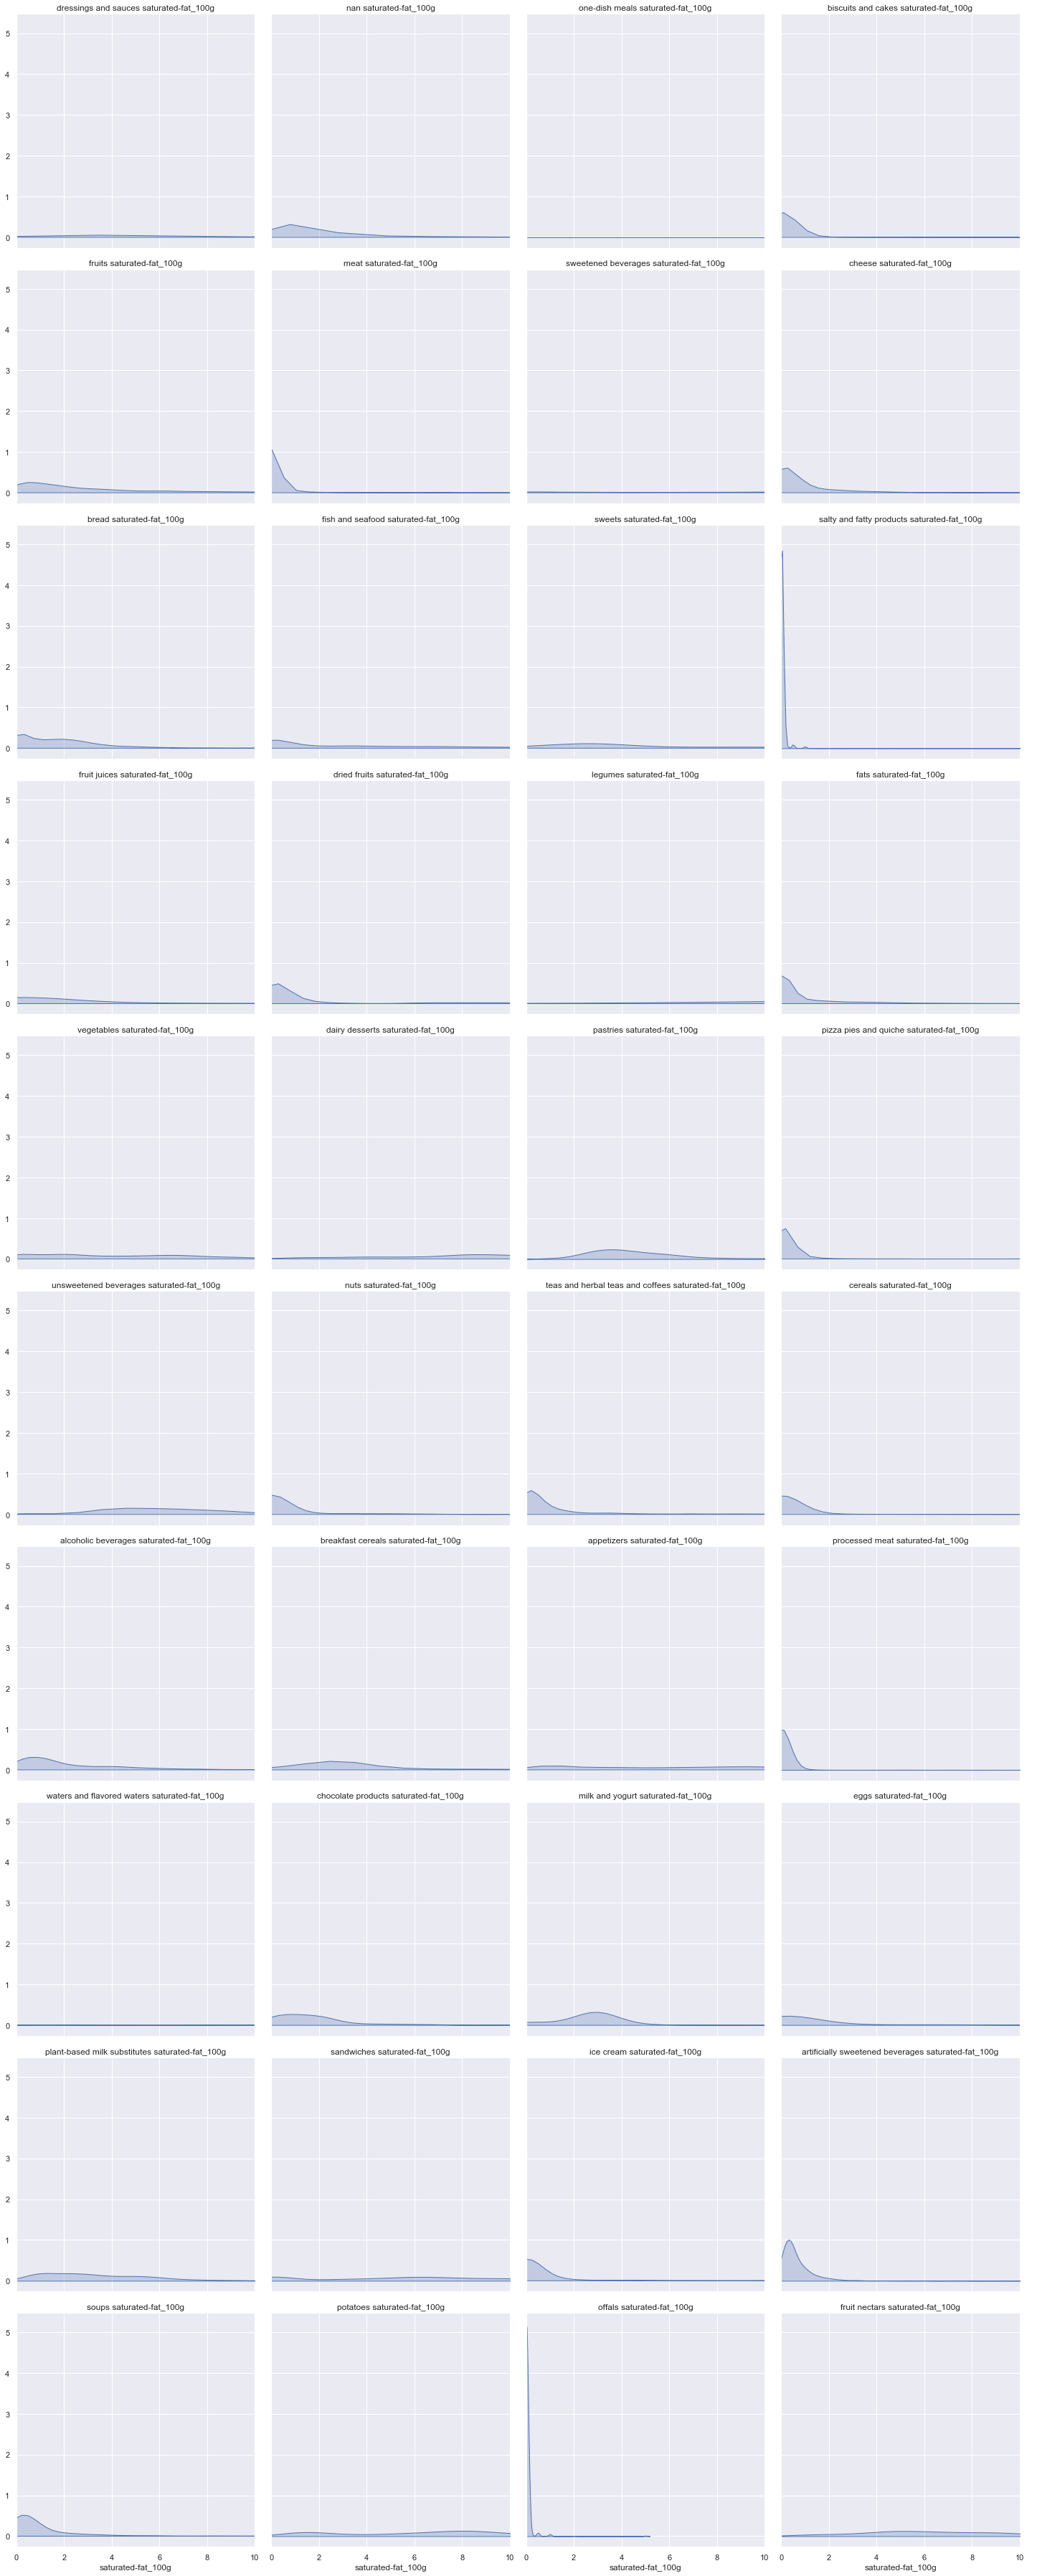

In [31]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.kdeplot, "saturated-fat_100g", fill=True)
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} saturated-fat_100g')
   plt.xlim(0,10)

In [32]:
df['trans-fat_100g'].describe()

count   243239.00000
mean         0.03791
std          0.78542
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max        220.00000
Name: trans-fat_100g, dtype: float64

C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Antoine\anaconda3\envs\off_ai_e

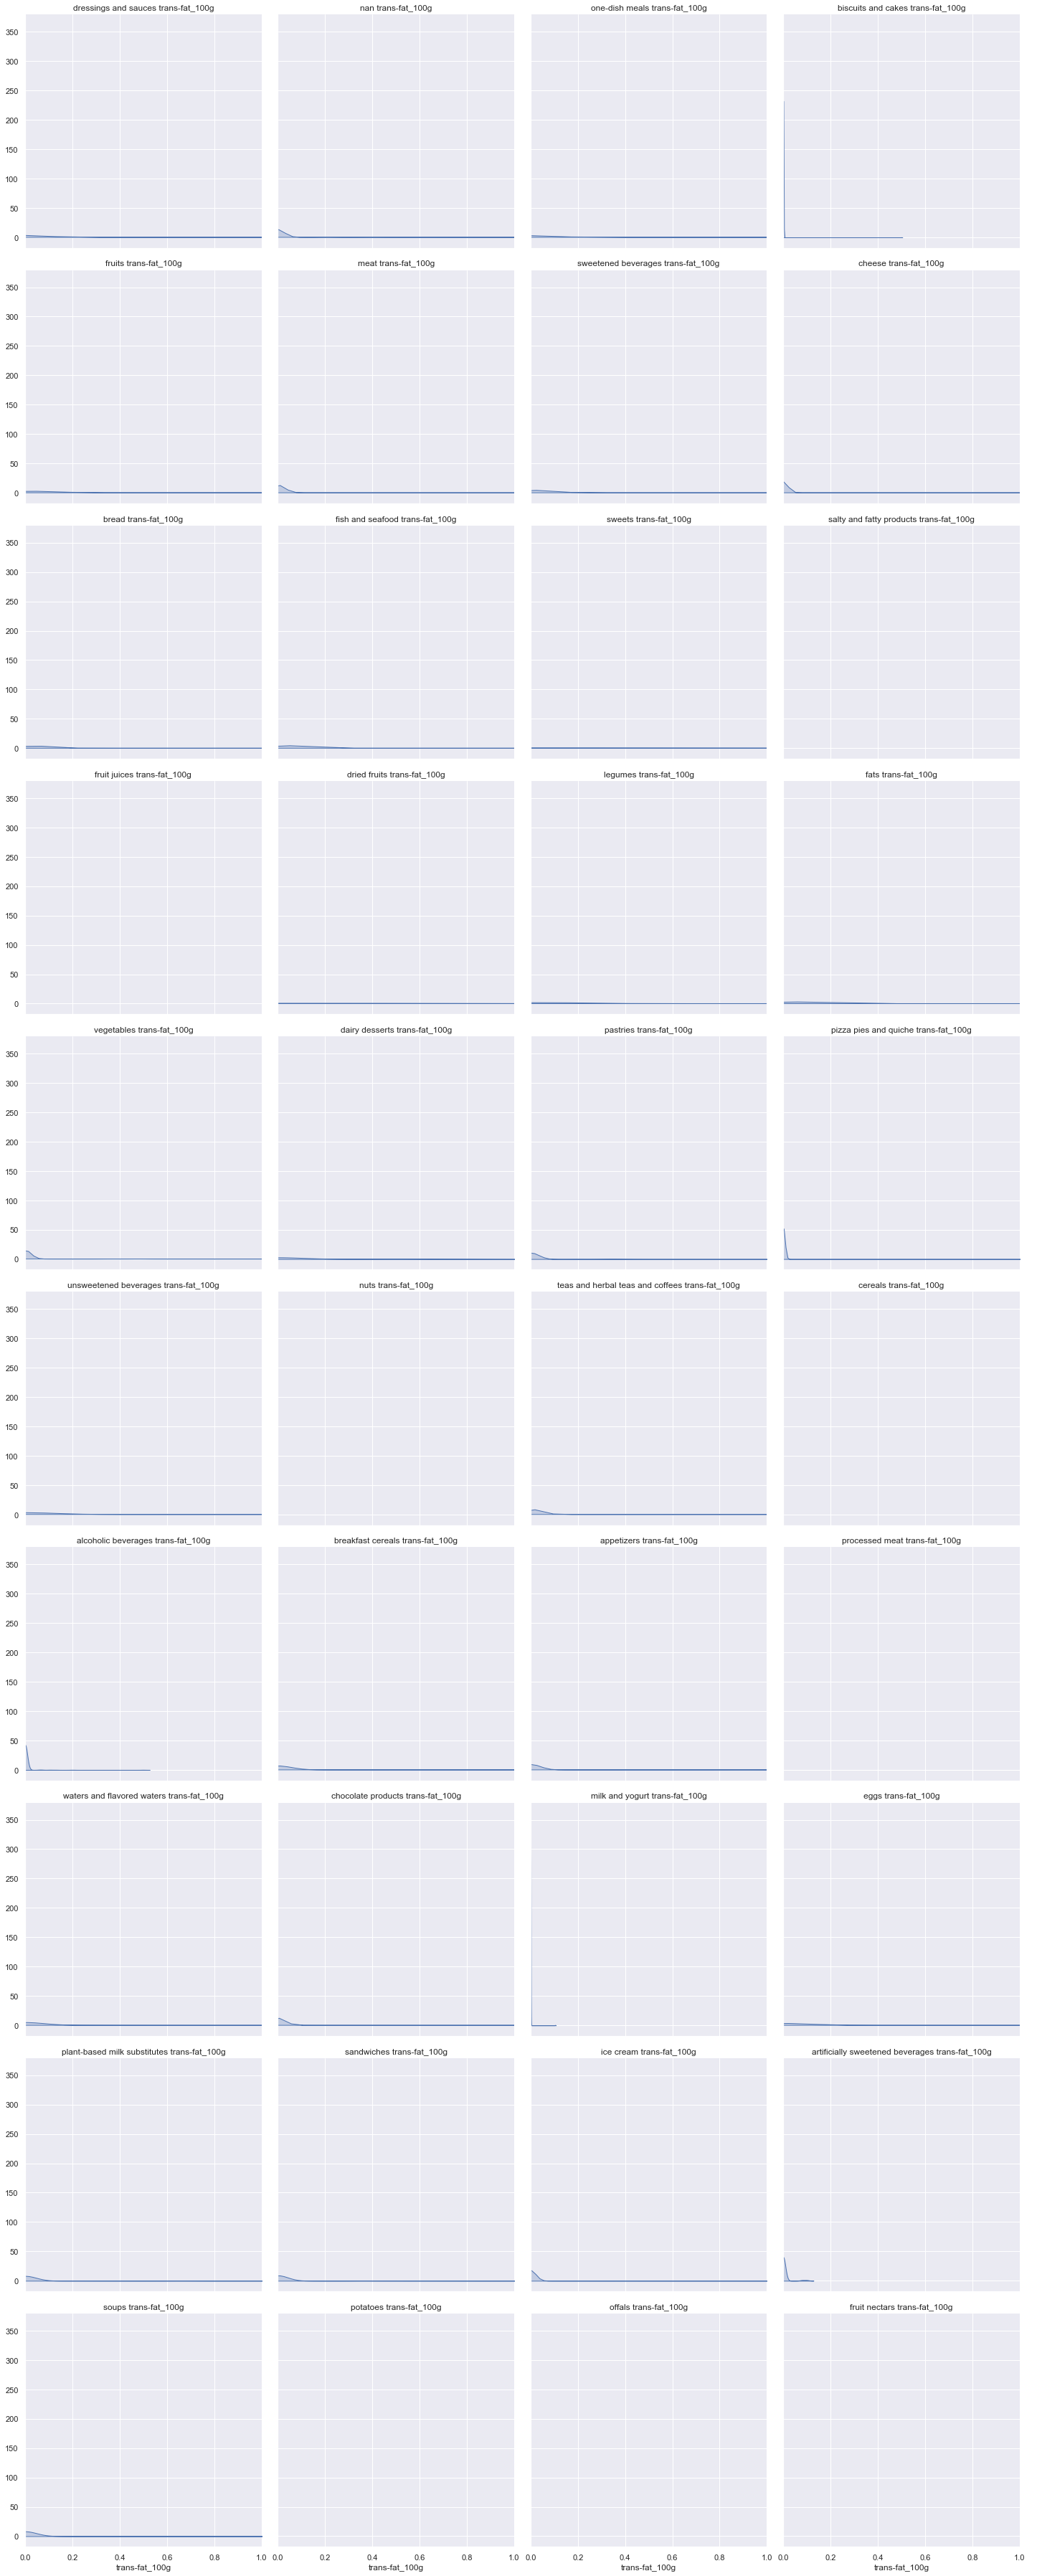

In [33]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.kdeplot, "trans-fat_100g", fill=True)
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} trans-fat_100g')
   plt.xlim(0,1)

# cholesterol_100g

In [34]:
df['cholesterol_100g'].describe()

count   247340.00000
mean         0.04929
std          1.42531
min          0.00000
25%          0.00000
50%          0.00000
75%          0.02200
max        141.00000
Name: cholesterol_100g, dtype: float64

# carbohydrates_100g

In [35]:
df['carbohydrates_100g'].describe()

count   713012.00000
mean        28.77929
std         44.37616
min          0.00000
25%          3.85000
50%         16.00000
75%         53.85000
max      28228.00000
Name: carbohydrates_100g, dtype: float64

Wall time: 21.6 s


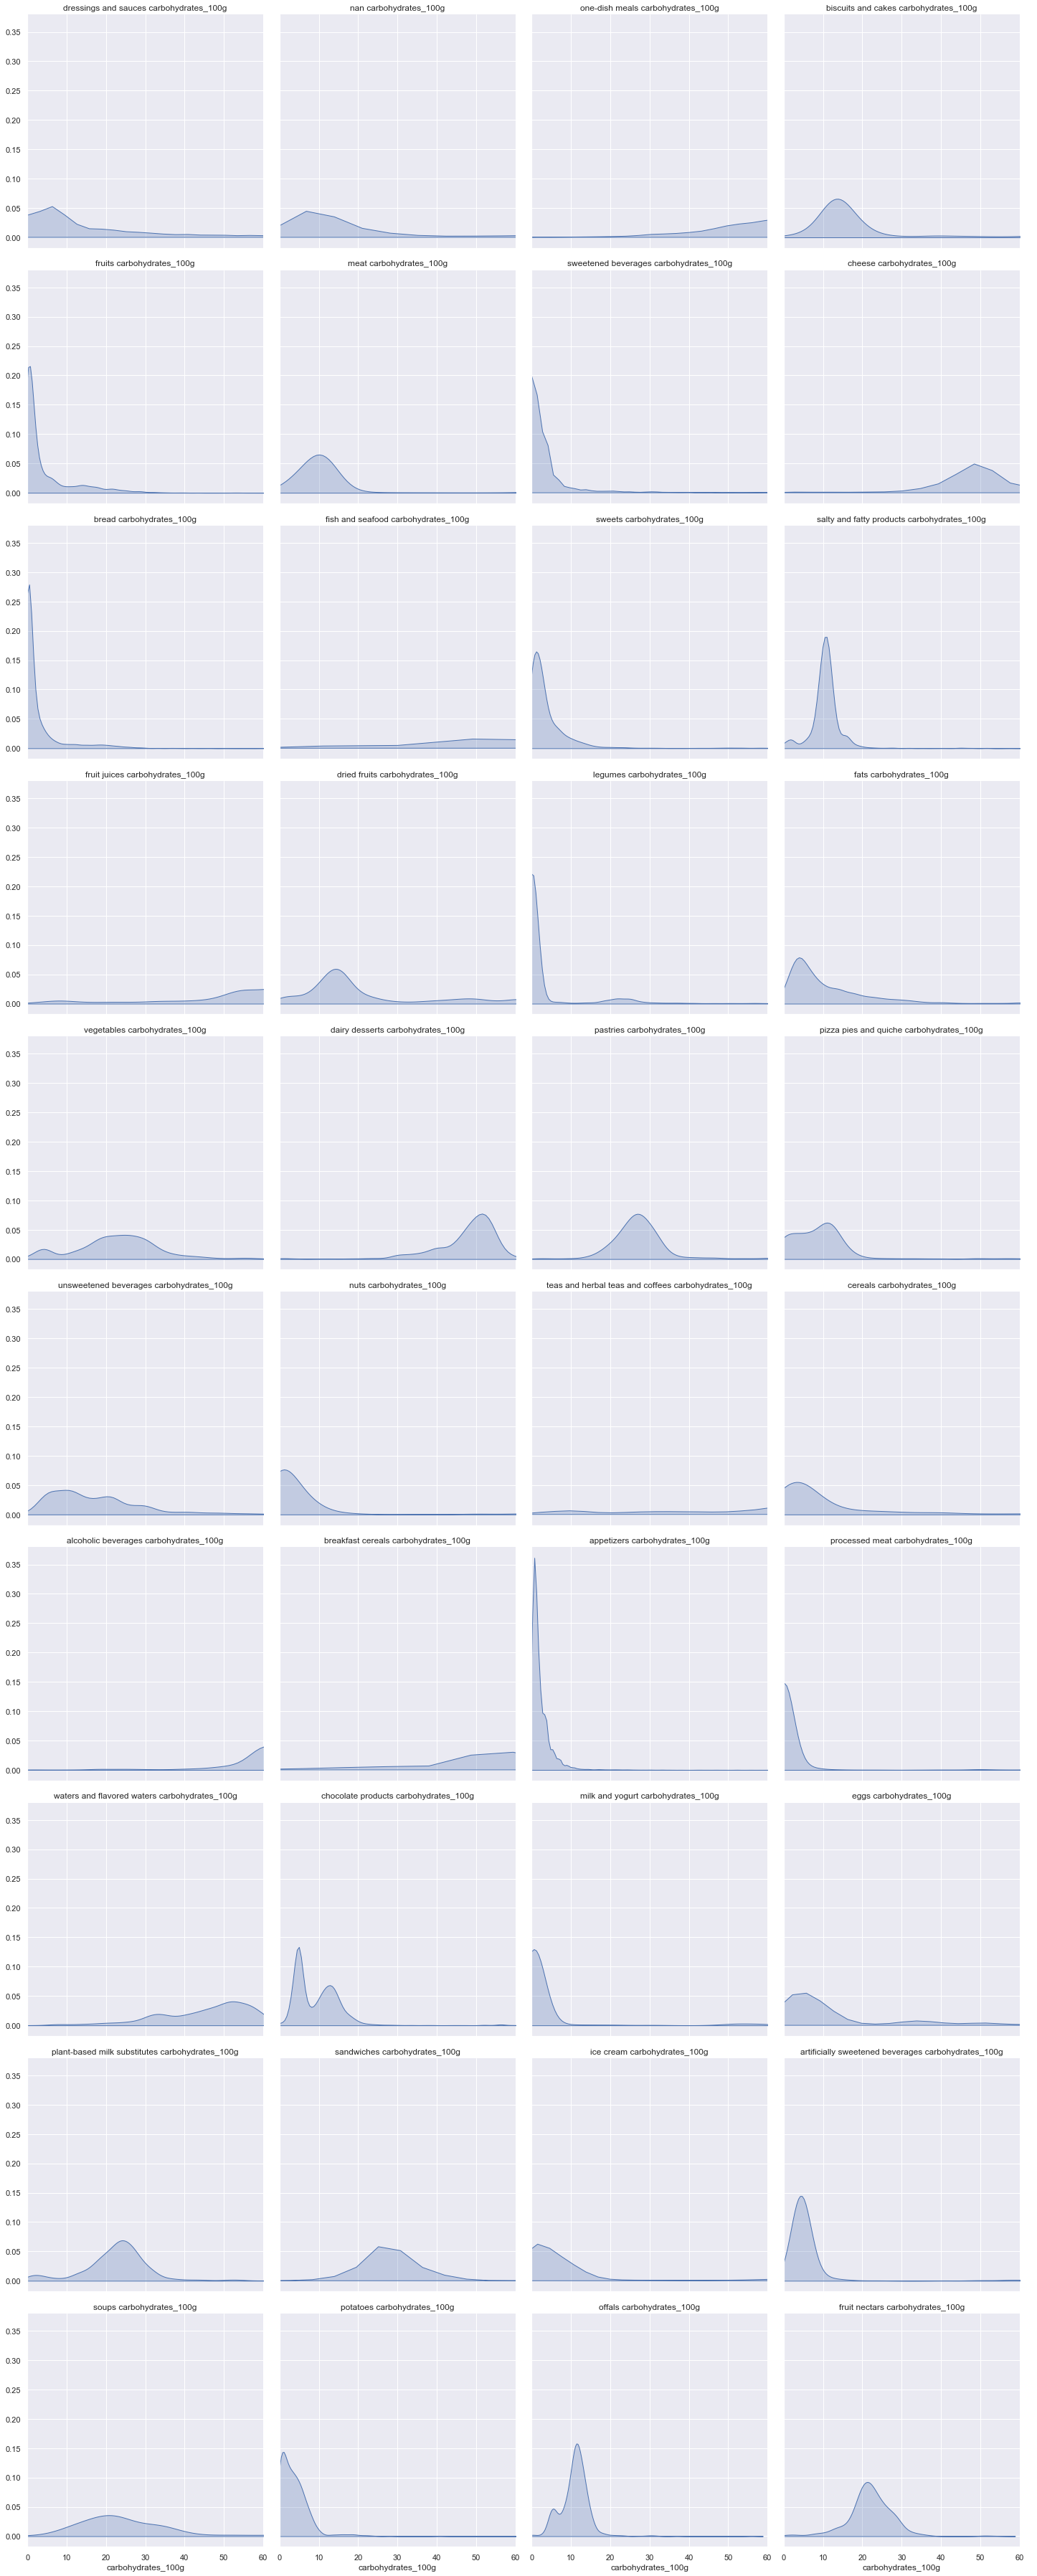

In [37]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.kdeplot, "carbohydrates_100g", fill=True)
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} carbohydrates_100g')
   plt.xlim(0,60)

In [38]:
df[cols['numeric']].isnull().sum()

additives_n                                241437
ingredients_from_palm_oil_n                241437
ingredients_that_may_be_from_palm_oil_n    241437
nutriscore_score                           178220
nova_group                                 280467
energy_100g                                 91901
fat_100g                                    94351
saturated-fat_100g                         134680
trans-fat_100g                             564780
cholesterol_100g                           560679
carbohydrates_100g                          95007
sugars_100g                                113219
proteins_100g                               94503
salt_100g                                  102878
vitamin-a_100g                             614830
vitamin-c_100g                             608015
potassium_100g                             721845
calcium_100g                               559718
iron_100g                                  564714
dtype: int64

# sugars

In [39]:
df['sugars_100g'].describe()

count   694800.00000
mean        14.89421
std        592.83548
min         -1.00000
25%          0.80000
50%          4.20000
75%         20.00000
max     493883.00000
Name: sugars_100g, dtype: float64

Wall time: 19.6 s


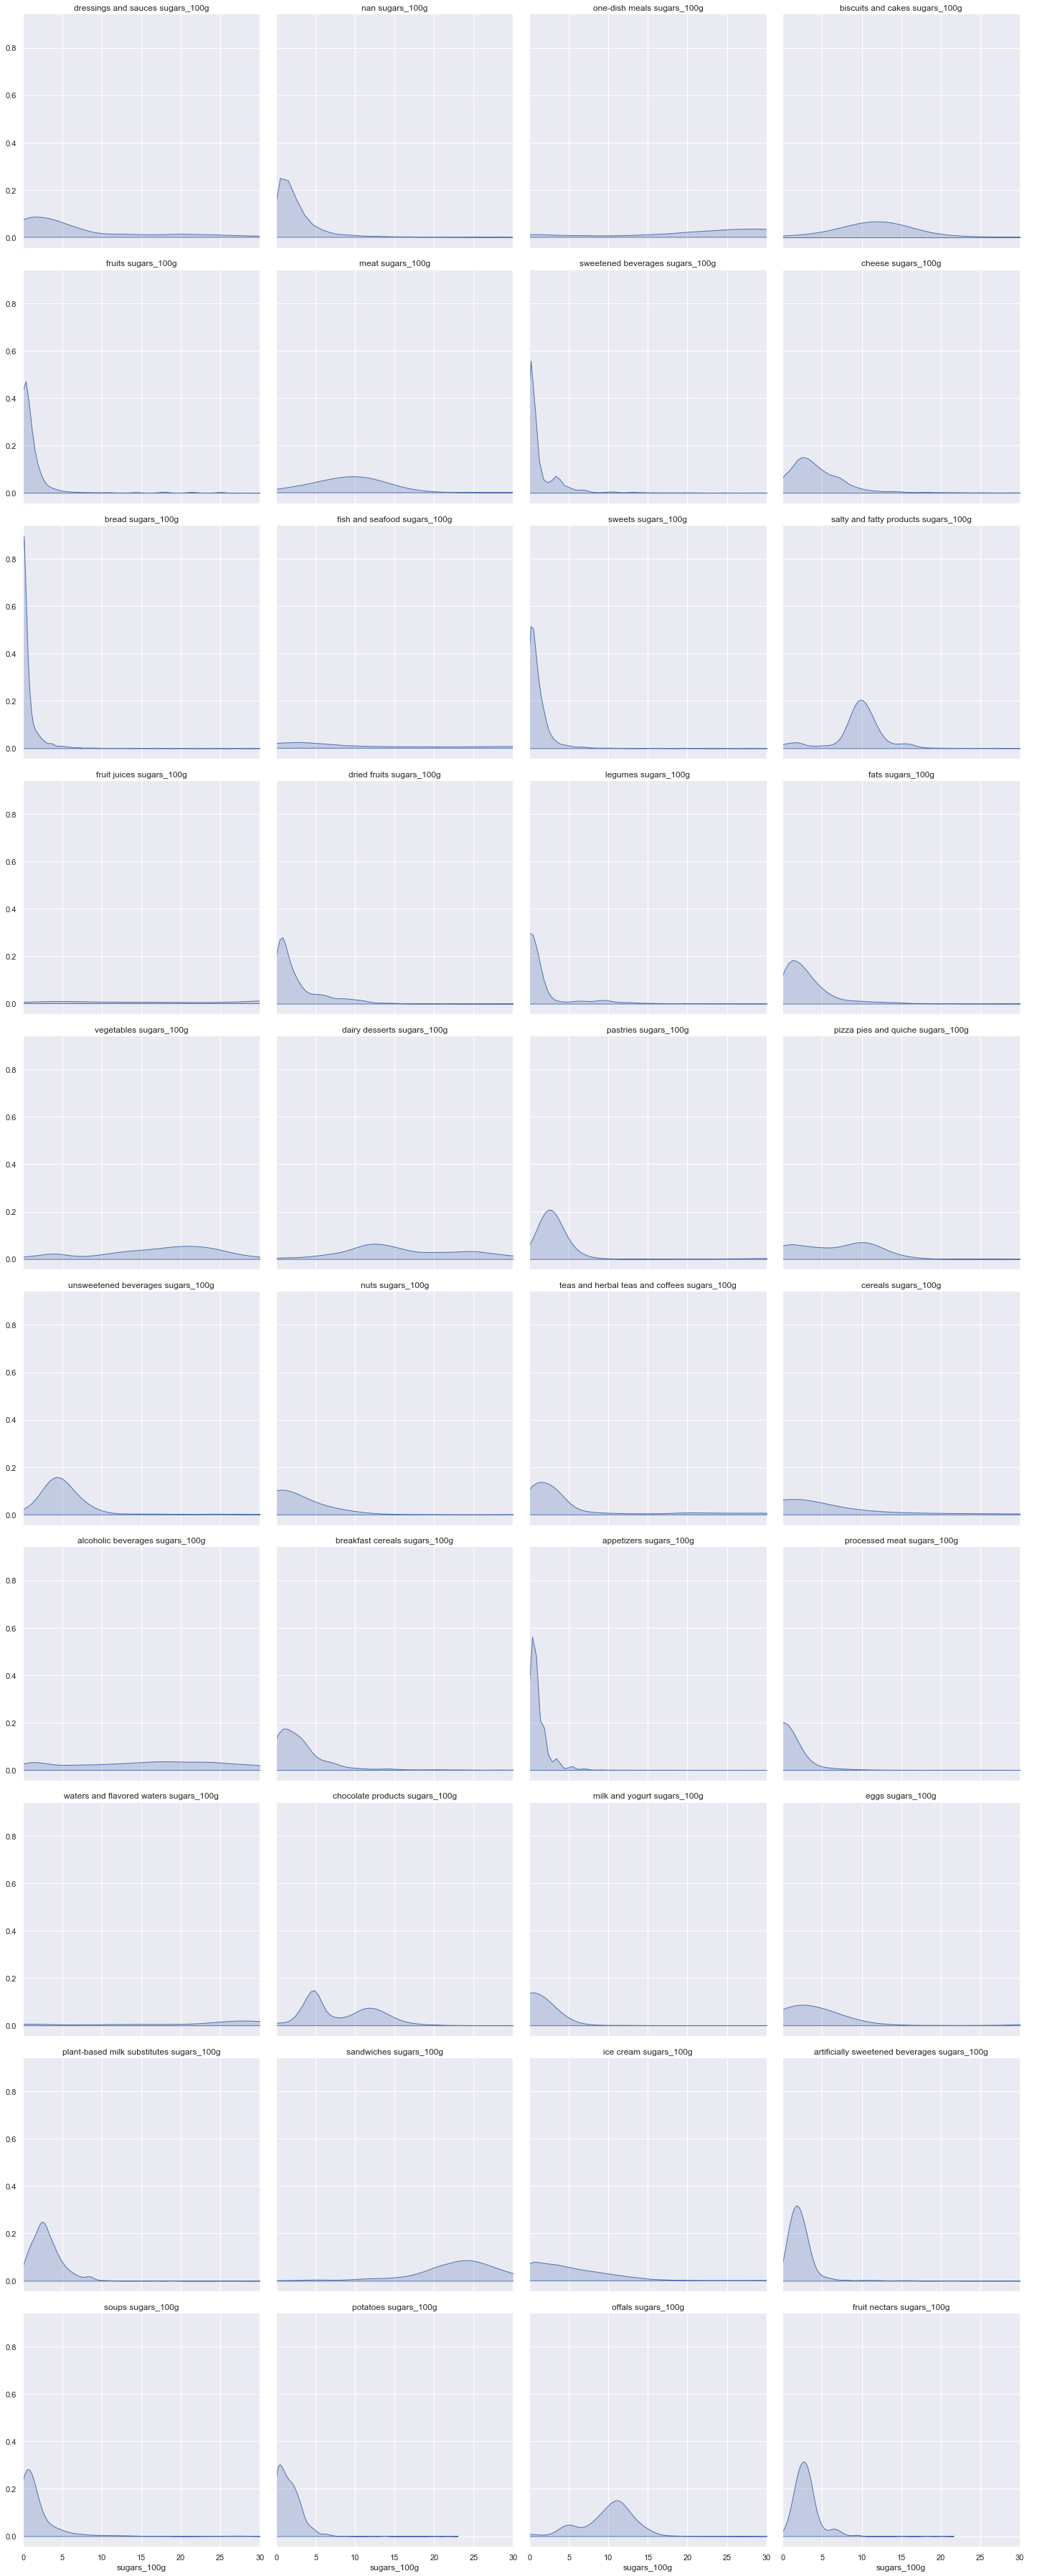

In [40]:
%%time
g = sns.FacetGrid(df, col="pnns_groups_2", col_wrap=4, height=5, palette='viridis')
g.map(sns.kdeplot, "sugars_100g", fill=True)
g.add_legend()
for ax, label in zip(g.axes.flat, labels):
   ax.set_title(f'{label} sugars_100g')
   plt.xlim(0,30)

## Drop outliers

In [9]:
df_copy = df.copy(deep=True)

In [17]:
df[cols['100g']].describe()

energy_100g       fat_100g  saturated-fat_100g  trans-fat_100g  \
count  7.161180e+05  713668.000000        6.733390e+05   243239.000000   
mean   5.085440e+07      13.897810        2.019785e+08        0.037906   
std    4.298452e+10     112.714839        1.657380e+11        0.785425   
min    0.000000e+00       0.000000        0.000000e+00        0.000000   
25%    4.060000e+02       0.500000        1.000000e-01        0.000000   
50%    1.075000e+03       6.500000        1.900000e+00        0.000000   
75%    1.674000e+03      21.430000        7.450000e+00        0.000000   
max    3.637509e+13   93928.000000        1.360000e+14      220.000000   

       cholesterol_100g  carbohydrates_100g    sugars_100g  proteins_100g  \
count     247340.000000       713012.000000  694800.000000  713516.000000   
mean           0.049287           28.779290      14.894214       7.911195   
std            1.425311           44.376157     592.835485      10.842156   
min            0.000000            0.000000      -1.000000       0.000000   
25%            0.000000            3.850000       0.800000       1.000000   
50%            0.000000           16.000000       4.200000       5.400000   
75%            0.022000           53.850000      20.000000      11.320755   
max          141.000000        28228.000000  493883.000000    2829.000000   

           salt_100g  vitamin-a_100g  vitamin-c_100g  potassium_100g  \
count  705141.000000   193189.000000   200004.000000    86174.000000   
mean        1.569252        0.095214        0.025620        0.397902   
std        15.910205        9.579136        0.795766        7.009279   
min         0.000000       -0.000340        0.000000        0.000000   
25%         0.060000        0.000000        0.000000        0.080000   
50%         0.550000        0.000000        0.000000        0.167000   
75%         1.322500        0.000107        0.004000        0.299000   
max      2489.200000     2200.000000      100.000000      875.000000   

        calcium_100g      iron_100g  
count  248301.000000  243305.000000  
mean        0.173266       0.007915  
std         5.060627       0.437911  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.036000       0.001000  
75%         0.110000       0.002400  
max       930.000000     120.000000

In [20]:
cols_outliers = ['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g'
 ]
for col in cols_outliers:
    df = df.loc[df[col] < 100]
df.shape

(645684, 184)

In [21]:
df[cols['numeric']].describe()

additives_n  ingredients_from_palm_oil_n  \
count  477202.000000                477202.000000   
mean        2.171041                     0.020534   
std         3.043904                     0.143698   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        39.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n  nutriscore_score  \
count                            477202.000000     621580.000000   
mean                                  0.071485          9.155969   
std                                   0.306073          8.931544   
min                                   0.000000        -15.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000         10.000000   
75%                                   0.000000         16.000000   
max                                   6.000000         40.000000   

          nova_group   energy_100g       fat_100g  saturated-fat_100g  \
count  449471.000000  6.450070e+05  645684.000000       645684.000000   
mean        3.413366  6.603315e+04      13.715891            5.143803   
std         0.959036  5.209661e+07      16.545275            7.607400   
min         1.000000  0.000000e+00       0.000000            0.000000   
25%         3.000000  4.480000e+02       1.000000            0.100000   
50%         4.000000  1.109000e+03       7.500000            1.900000   
75%         4.000000  1.674000e+03      22.000000            7.200000   
max         4.000000  4.184000e+10      99.990000           99.900000   

       trans-fat_100g  cholesterol_100g  carbohydrates_100g    sugars_100g  \
count   232608.000000     236800.000000       645684.000000  645684.000000   
mean         0.036648          0.042178           28.822202      13.403158   
std          0.774191          1.232701           27.514851      18.742232   
min          0.000000          0.000000            0.000000      -1.000000   
25%          0.000000          0.000000            4.400000       0.800000   
50%          0.000000          0.000000           17.000000       4.000000   
75%          0.000000          0.021000           53.600000      20.000000   
max        220.000000        133.000000           99.950000      99.950000   

       proteins_100g      salt_100g  vitamin-a_100g  vitamin-c_100g  \
count  645684.000000  645684.000000   186453.000000   189765.000000   
mean        8.391485       1.183834        0.074047        0.016340   
std         8.789187       3.729797        7.927935        0.604381   
min         0.000000       0.000000        0.000000        0.000000   
25%         1.800000       0.100000        0.000000        0.000000   
50%         6.000000       0.600000        0.000000        0.000000   
75%        12.000000       1.340000        0.000106        0.003400   
max        99.000000      99.990000     2000.000000       90.000000   

       potassium_100g   calcium_100g      iron_100g  
count    80352.000000  239291.000000  234888.000000  
mean         0.380688       0.156090       0.005722  
std          6.911829       4.517213       0.263282  
min          0.000000       0.000000       0.000000  
25%          0.088000       0.000000       0.000000  
50%          0.171000       0.038000       0.001000  
75%          0.304000       0.111000       0.002410  
max        875.000000     930.000000      60.900000

In [23]:
cols_for_median = ['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'potassium_100g',
 'calcium_100g',
 'iron_100g']

In [89]:
num_stats = pd.DataFrame(columns=cols_for_median, index=labels)
num_stats.shape

(41, 14)

In [90]:
%%time
for col in cols_for_median:
    data = df.dropna(subset=[col])
    for label in labels:
        med = data.loc[data['pnns_groups_2'] == label][col].median()
        num_stats.loc[label][col] = med
num_stats

Wall time: 42.3 s


energy_100g fat_100g saturated-fat_100g  \
dressings and sauces                     623      3.8                0.3   
NaN                                      NaN      NaN                NaN   
one-dish meals                           580     5.15                1.2   
biscuits and cakes                      1820       19                6.9   
fruits                                   268      0.1                  0   
meat                                     703        7               1.79   
sweetened beverages                      184        0                  0   
cheese                                  1439       28              17.86   
bread                                   1155     3.77                0.5   
fish and seafood                         720      8.5                1.5   
sweets                                  1791    16.67               3.57   
salty and fatty products                1219       25                  5   
fruit juices                             190      0.1                  0   
dried fruits                            1326      0.6               0.12   
legumes                                  485     1.15               0.15   
fats                                    3113       82               13.7   
vegetables                               234      0.5                0.1   
dairy desserts                           770      7.2               4.38   
pastries                                1536       15                  9   
pizza pies and quiche                   1000     9.72                4.2   
unsweetened beverages                    176        0                  0   
nuts                                    2565       50                  6   
teas and herbal teas and coffees          25        0                  0   
cereals                                 1494      2.4                0.4   
alcoholic beverages                      180        0                  0   
breakfast cereals                       1619        7                1.4   
appetizers                              2088       25                  3   
processed meat                          1046     18.3                6.9   
waters and flavored waters                 0        0                  0   
chocolate products                      2307       36               20.6   
milk and yogurt                          335      2.6               1.47   
eggs                                     594      9.9                2.8   
plant-based milk substitutes             234        2                0.3   
sandwiches                               971    9.765                2.9   
ice cream                                900       10                6.3   
artificially sweetened beverages         109        0                  0   
soups                                    167      1.7                0.4   
potatoes                               654.5     2.89                0.5   
offals                                   946       18                6.8   
fruit nectars                            197      0.1                  0   
pizza pies and quiches                  1017       13                6.3   

                                 trans-fat_100g cholesterol_100g  \
dressings and sauces                          0                0   
NaN                                         NaN              NaN   
one-dish meals                                0            0.004   
biscuits and cakes                            0                0   
fruits                                        0                0   
meat                                          0            0.058   
sweetened beverages                           0                0   
cheese                                        0            0.089   
bread                                         0                0   
fish and seafood                              0            0.054   
sweets                                        0                0   
salty and fatty products

In [91]:
num_stats = num_stats.drop(index=np.nan)
num_stats

energy_100g fat_100g saturated-fat_100g  \
dressings and sauces                     623      3.8                0.3   
one-dish meals                           580     5.15                1.2   
biscuits and cakes                      1820       19                6.9   
fruits                                   268      0.1                  0   
meat                                     703        7               1.79   
sweetened beverages                      184        0                  0   
cheese                                  1439       28              17.86   
bread                                   1155     3.77                0.5   
fish and seafood                         720      8.5                1.5   
sweets                                  1791    16.67               3.57   
salty and fatty products                1219       25                  5   
fruit juices                             190      0.1                  0   
dried fruits                            1326      0.6               0.12   
legumes                                  485     1.15               0.15   
fats                                    3113       82               13.7   
vegetables                               234      0.5                0.1   
dairy desserts                           770      7.2               4.38   
pastries                                1536       15                  9   
pizza pies and quiche                   1000     9.72                4.2   
unsweetened beverages                    176        0                  0   
nuts                                    2565       50                  6   
teas and herbal teas and coffees          25        0                  0   
cereals                                 1494      2.4                0.4   
alcoholic beverages                      180        0                  0   
breakfast cereals                       1619        7                1.4   
appetizers                              2088       25                  3   
processed meat                          1046     18.3                6.9   
waters and flavored waters                 0        0                  0   
chocolate products                      2307       36               20.6   
milk and yogurt                          335      2.6               1.47   
eggs                                     594      9.9                2.8   
plant-based milk substitutes             234        2                0.3   
sandwiches                               971    9.765                2.9   
ice cream                                900       10                6.3   
artificially sweetened beverages         109        0                  0   
soups                                    167      1.7                0.4   
potatoes                               654.5     2.89                0.5   
offals                                   946       18                6.8   
fruit nectars                            197      0.1                  0   
pizza pies and quiches                  1017       13                6.3   

                                 trans-fat_100g cholesterol_100g  \
dressings and sauces                          0                0   
one-dish meals                                0            0.004   
biscuits and cakes                            0                0   
fruits                                        0                0   
meat                                          0            0.058   
sweetened beverages                           0                0   
cheese                                        0            0.089   
bread                                         0                0   
fish and seafood                              0            0.054   
sweets                                        0                0   
salty and fatty products                      0                0   
fruit juices                                  0                0   
dried fruits                    

## Testing Missing Values Imputation Strategies

In [109]:
df_nonan = df[
['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'potassium_100g',
 'calcium_100g',
 'iron_100g','pnns_groups_2']
 ].dropna()

df_nonan.shape

(39007, 15)

In [112]:
df_nonan = df_nonan.reset_index(drop=True)
df_nonan.head(5)

energy_100g  fat_100g  saturated-fat_100g  trans-fat_100g  \
0       1090.0     10.70                2.00           0.667   
1        478.0      6.79                2.86           0.000   
2       2243.0     32.14                3.57           0.000   
3        192.0      0.00                0.00           0.000   
4        226.0      0.00                0.00           0.000   

   cholesterol_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
0           0.00533               38.70       24.700           3.33   
1           0.01070                7.86        0.714           5.36   
2           0.00000               57.14        0.000           7.14   
3           0.00000               11.67       10.420           0.00   
4           0.00000               13.33       13.330           0.00   

   salt_100g  vitamin-a_100g  vitamin-c_100g  potassium_100g  calcium_100g  \
0     0.6470        0.000000        0.001600           0.000        0.0133   
1     0.4990        0.000011        0.000429           0.000        0.0286   
2     0.9375        0.000000        0.021400           1.536        0.0000   
3     0.0375        0.000000        0.000000           0.079        0.0000   
4     0.0100        0.000000        0.000500           0.015        0.0000   

   iron_100g          pnns_groups_2  
0   0.000480               pastries  
1   0.000643  pizza pies and quiche  
2   0.001290             appetizers  
3   0.000150  unsweetened beverages  
4   0.000000    sweetened beverages

In [218]:
df_randomnans = df_nonan.copy(deep=True)

In [219]:
length = len(df_nonan)
num = int(0.15*length)
y_indexes = {}
for col in cols_for_median:
    idx_replace = np.unique(np.random.randint(0, length-1, num))
    up = {col:idx_replace}
    y_indexes.update(up)
    df_randomnans.loc[idx_replace, col] = np.nan

df_randomnans.isnull().sum()

energy_100g           5399
fat_100g              5419
saturated-fat_100g    5437
trans-fat_100g        5396
cholesterol_100g      5426
carbohydrates_100g    5428
sugars_100g           5437
proteins_100g         5445
salt_100g             5409
vitamin-a_100g        5441
vitamin-c_100g        5416
potassium_100g        5455
calcium_100g          5430
iron_100g             5439
pnns_groups_2            0
dtype: int64

In [220]:
y_true = {}
for col, idx in zip(y_indexes.keys(), y_indexes.values()):
    up = {col:np.array(df_nonan.loc[idx, col])}
    y_true.update(up)

In [164]:
df_randomnans = df_randomnans.fillna('m')

In [165]:
set(labels) - set(df_randomnans['pnns_groups_2'].unique())

{nan, 'offals', 'pizza pies and quiches'}

In [ ]:
num_stats = num_stats.drop(index=['offals', 'pizza pies and quiches'])

In [166]:
df_medians = df_randomnans.copy(deep=True)
y_median = {}

for col in cols_for_median:
    df_medians[col] = df_medians.apply(lambda x: num_stats[col][x['pnns_groups_2']] if x[col] == 'm' else x[col], axis=1)

for col, idx in zip(y_indexes.keys(), y_indexes.values()):
    up = {col:np.array(df_medians.loc[idx, col])}
    y_median.update(up)

In [171]:
from sklearn.metrics import r2_score
R2_medians = {}
for col in cols_for_median:
    r2col = {col:round(r2_score(y_true[col], y_median[col]),2)}
    R2_medians.update(r2col)

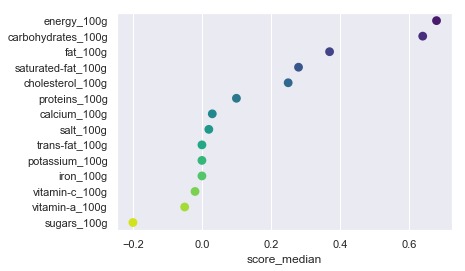

In [247]:
scores = pd.DataFrame(columns=['score_median'], index=R2_medians.keys(), data=R2_medians.values())
scores = scores.sort_values(by=['score_median'], ascending=False)
sns.pointplot(y=scores.index, x=scores['score_median'],  join=False, palette='viridis')

In [213]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(0)

In [249]:
df_imputer = df_randomnans.copy(deep=True)
X = df_imputer.drop(columns=['pnns_groups_2'])

In [266]:
scores = pd.DataFrame(columns=['score_median'], index=R2_medians.keys(), data=R2_medians.values())

In [300]:
scores_copy = scores.copy(deep=True)

In [301]:
%%time
#Define estimators

estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=42),
    ExtraTreesRegressor(n_estimators=10, random_state=42, n_jobs=-1),
    KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
]

names =['bayesridge', 'tree', 'extra_trees', 'KNN']

#Loop through estimators
for est, name in zip(estimators, names) :
    #Instance imputer
    imp = IterativeImputer(estimator=est,missing_values=np.nan, max_iter=10, verbose=1, imputation_order='roman',random_state=0)
    #Instance X with nans
    X = df_imputer.drop(columns=['pnns_groups_2'])
    #Fit nan with imputer
    X_transformed = imp.fit_transform(X)
    #Rescale data
    X = pd.DataFrame(data=X_transformed, columns=y_indexes.keys())
    #Save predicted values
    y_hat = {}
    for col, idx in zip(y_indexes.keys(), y_indexes.values()):
        up = {col:np.array(X.loc[idx, col])}
        y_hat.update(up)
    #Estimate scores
    r2_est = {}
    for col in cols_for_median:
        r2col = {col:round(r2_score(y_true[col], y_hat[col]),2)}
        r2_est.update(r2col)
    #Append scores df with estimated scores
    scores_copy['score_' + name] = r2_est.values()

[IterativeImputer] Completing matrix with shape (39007, 14)
[IterativeImputer] Change: 2667.142627132124, scaled tolerance: 6.038 
[IterativeImputer] Change: 916.5661961098216, scaled tolerance: 6.038 
[IterativeImputer] Change: 1024.9011427103019, scaled tolerance: 6.038 
[IterativeImputer] Change: 981.9749008809883, scaled tolerance: 6.038 
[IterativeImputer] Change: 561.8722256787228, scaled tolerance: 6.038 
[IterativeImputer] Change: 350.2450031413425, scaled tolerance: 6.038 
[IterativeImputer] Change: 228.36518996567247, scaled tolerance: 6.038 
[IterativeImputer] Change: 157.20693177175508, scaled tolerance: 6.038 
[IterativeImputer] Change: 108.4640232487427, scaled tolerance: 6.038 
[IterativeImputer] Change: 74.05098545859028, scaled tolerance: 6.038 
[IterativeImputer] Completing matrix with shape (39007, 14)
C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not r

Text(0.5,1,'Na imputation strategies $R^2$ Scores by feature ')

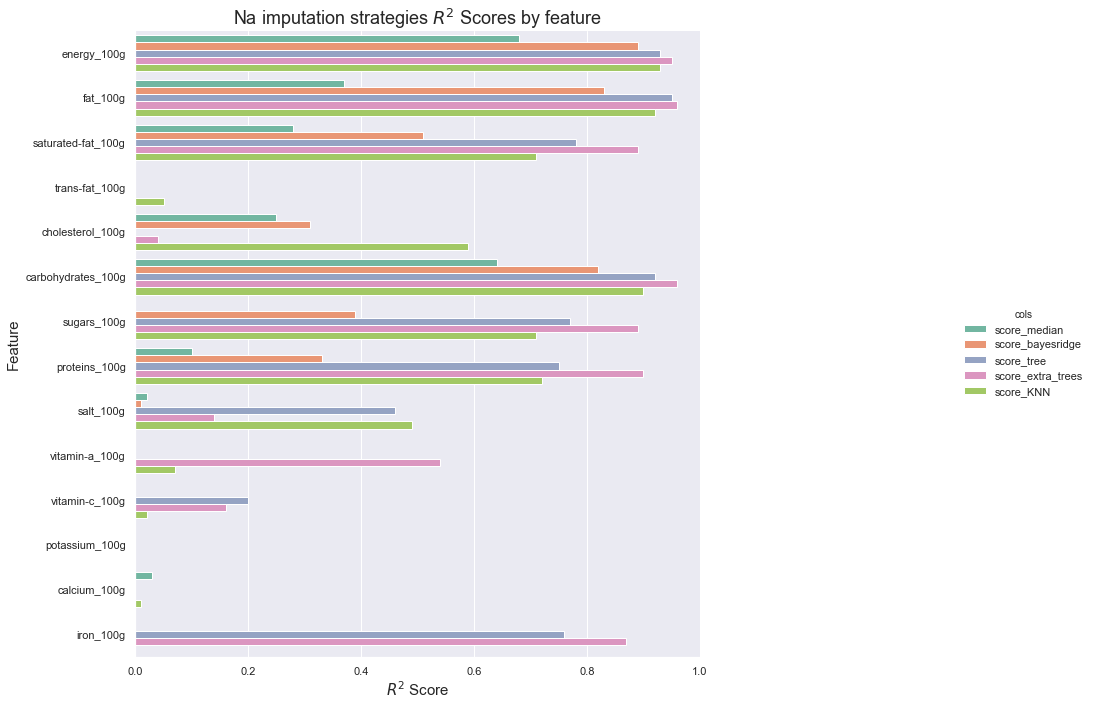

In [319]:
sc = scores_copy.reset_index().melt('index', var_name='cols',  value_name='vals')
sns.catplot(x="vals", y="index", hue='cols', data=sc, kind='bar', palette='Set2')
plt.gcf().set_size_inches(20, 10)
plt.xlabel(r'$R^2$ Score', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xlim(0,1)
plt.title(r'Na imputation strategies $R^2$ Scores by feature ', fontsize=18)

In [321]:
scores_copy.loc[scores_copy['score_extra_trees'] > 0.75]

score_median  score_bayesridge  score_tree  \
energy_100g                 0.68              0.89        0.93   
fat_100g                    0.37              0.83        0.95   
saturated-fat_100g          0.28              0.51        0.78   
carbohydrates_100g          0.64              0.82        0.92   
sugars_100g                -0.20              0.39        0.77   
proteins_100g               0.10              0.33        0.75   
iron_100g                   0.00            -21.72        0.76   

                    score_extra_trees  score_KNN  
energy_100g                      0.95       0.93  
fat_100g                         0.96       0.92  
saturated-fat_100g               0.89       0.71  
carbohydrates_100g               0.96       0.90  
sugars_100g                      0.89       0.71  
proteins_100g                    0.90       0.72  
iron_100g                        0.87     -12.96

In [323]:
features_nan = list(scores_copy.loc[scores_copy['score_extra_trees'] > 0.75].index)
features_nan

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'iron_100g']

# Applying Extra Trees to full data

In [327]:
df = df_copy.copy(deep=True)

In [328]:
df[features_nan].isnull().sum()

energy_100g            91901
fat_100g               94351
saturated-fat_100g    134680
carbohydrates_100g     95007
sugars_100g           113219
proteins_100g          94503
iron_100g             564714
dtype: int64

In [329]:
cols_outliers = ['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g'
 ]
for col in cols_outliers:
    df = df.loc[df[col] < 100]
df.shape

(645684, 184)

In [334]:
%%time
imp = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=30, random_state=42, n_jobs=-1),missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X = df[features_nan]
X_transformed = imp.fit_transform(X)
X = pd.DataFrame(data=X_transformed, columns=features_nan)
df[features_nan] = X

[IterativeImputer] Completing matrix with shape (645684, 7)
[IterativeImputer] Ending imputation round 1/10, elapsed time 74.29
[IterativeImputer] Change: 80715.62889588274, scaled tolerance: 41840000.0 
[IterativeImputer] Early stopping criterion reached.
Wall time: 1min 14s


In [337]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df[features_nan].describe()

energy_100g     fat_100g  saturated-fat_100g  carbohydrates_100g  \
count      518582.00000 518582.00000        518582.00000        518582.00000   
mean        81842.87858     13.84187             4.83468            29.75942   
std      58100911.89567     14.93103             6.96697            24.96163   
min             0.00000      0.00000             0.00000             0.00000   
25%           573.00000      1.79000             0.26000             6.20000   
50%          1147.60000     13.00000             3.35500            31.25000   
75%          1569.00000     18.00000             5.50000            47.00000   
max   41840000000.00000     99.99000            99.90000            99.95000   

       sugars_100g  proteins_100g    iron_100g  
count 518582.00000   518582.00000 518582.00000  
mean      13.64251        9.30292      0.01876  
std       16.92445        8.19053      0.35895  
min       -1.00000        0.00000      0.00000  
25%        1.30000        2.94000      0.00036  
50%        7.93000        7.80000      0.00144  
75%       14.95667       13.18067      0.00423  
max       99.95000       99.00000     60.90000

In [339]:
for col in cols_outliers:
    df_copy = df_copy.loc[df_copy[col] < 100]
df_copy.shape

(645684, 184)

In [345]:
np.abs(df_copy[features_nan].describe().round(2) - df[features_nan].describe().round(2))

energy_100g     fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  126425.00000 127102.00000        127102.00000        127102.00000   
mean    15809.73000      0.12000             0.31000             0.94000   
std   6004302.99000      1.62000             0.64000             2.55000   
min         0.00000      0.00000             0.00000             0.00000   
25%       125.00000      0.79000             0.16000             1.80000   
50%        38.60000      5.50000             1.45000            14.25000   
75%       105.00000      4.00000             1.70000             6.60000   
max         0.00000      0.00000             0.00000             0.00000   

       sugars_100g  proteins_100g    iron_100g  
count 127102.00000   127102.00000 283694.00000  
mean       0.24000        0.91000      0.01000  
std        1.82000        0.60000      0.10000  
min        0.00000        0.00000      0.00000  
25%        0.50000        1.14000      0.00000  
50%        3.93000        1.80000      0.00000  
75%        5.04000        1.18000      0.00000  
max        0.00000        0.00000      0.00000

In [347]:
df.to_csv(r'C:\Users\Antoine\Coding Bootcamp\Open Food Facts\df_imputed.csv', index = False, header=True)